In [31]:
def ngramEntropy(corpora,gram,base = 2):
    #import time
    #start = time.clock()
    global grams
    grams = {}
    gram -= 1
    for x in range(len(corpora)-gram):
        group = corpora[x]
        for i in range(1,gram+1):
            if type(corpora) == str:
                group += corpora[x+i]
            elif type(corpora) == list:
                group += " " + corpora[x+i]
        if (group in grams) == False:
            grams[group] = 1
        else:
            grams[group] += 1
    from math import log
    total = 0
    for b in grams:
        freq = grams[b]/(len(corpora)-gram)
        total += -freq*log(freq,base)
    if gram > 0:
        global grams2
        grams2 = {}
        gram -= 1
        for x in range(len(corpora)-gram):
            group = corpora[x]
            for i in range(1,gram+1):
                if type(corpora) == str:
                    group += corpora[x+i]
                elif type(corpora) == list:
                    group += " " + corpora[x+i]
            if (group in grams2) == False:
                grams2[group] = 1
            else:
                grams2[group] += 1
        for b in grams2:
            freq = grams2[b]/(len(corpora)-gram)
            total += freq*log(freq,base)
    #end = time.clock()
    #totaltime = end - start
    #print("The time the function takes is %.16f seconds" % (totaltime))
    return total

In [33]:
def FreqPlot(grams,text,replace = False,turn=0):
    from pandas import DataFrame
    from numpy import array
    from matplotlib.pyplot import plot, show
    Frequencies = sorted(grams.values(), reverse = True)
    Frequencies = array(Frequencies)/len(text)
    Letters = sorted(grams, key = grams.__getitem__, reverse = True)
    if len(grams) > 30:
        Frequencies = Frequencies[:30]
        Letters = Letters[:30]
    if replace != False:
        A = [str(y) for y in (range(1,len(replace)+1))]
        for x in zip(A,replace):
            for l in range(len(Letters)):
                if Letters[l] == x[0]:
                    Letters[l] = x[1]
    chart = DataFrame(Frequencies ,index = Letters,columns = ["Frequencies"])
    chart.plot(kind="bar",figsize = (20,10),fontsize=40,rot=turn,width=1,edgecolor="k",legend=False)
    show()
    return None

In [32]:
def Ur(corpora):
    from math import log
    Fd = ngramEntropy(corpora,2)
    return Fd/log(len(grams)/len(grams2),2)

def Cr(corpora,alpha = 7):
    ngramEntropy(corpora,2)
    return len(grams)/len(grams2) + alpha*sum([1 for key in grams if grams[key] == 1])/(len(corpora)-1)

In [1]:
import os
Categories = {}
for filename in os.listdir(r"C:\Users\Billy\Downloads\S3RP 2018\Corpora\Bonus Puzzle\Bonus Puzzle"):
    if ".txt" in filename:
        with open(r"C:\Users\Billy\Downloads\S3RP 2018\Corpora\Bonus Puzzle\Bonus Puzzle" +"\\"+ filename) as f:
            I = f.read()
        B = I.split("\t")
        BO = "".join(B)
        A = BO.split("\n")
        for x in range(1,len(A)-1):
            if (A[x][1].upper() == A[x][1]) and (A[x-1][1].upper() != A[x-1][1]):
                if A[x-1] not in Categories:
                    Categories[A[x-1]] = [A[x]]
                elif A[x-1] in Categories:
                    Categories[A[x-1]].append(A[x])
for cat in Categories:
    for x in range(len(Categories[cat])):
        NI = []
        for y in Categories[cat][x]:
            if y not in list("ABCDEFGHIJKLMNOPQRSTUVWXYZ "):
                NI.append(y)
            for n in NI:
                Categories[cat][x] = Categories[cat][x].replace(n,"")
        Categories[cat][x] = Categories[cat][x].split()

In [29]:
BPL = {key: "".join([word for phrase in Categories[key] for word in phrase]) for key in Categories}
BPW = {key: " ".join([word for phrase in Categories[key] for word in phrase]).split() for key in Categories}
BPTL = "".join([BPL[key] for key in BPL])
BPTW = [word for key in BPW for word in BPW[key]]

4.397178175597324


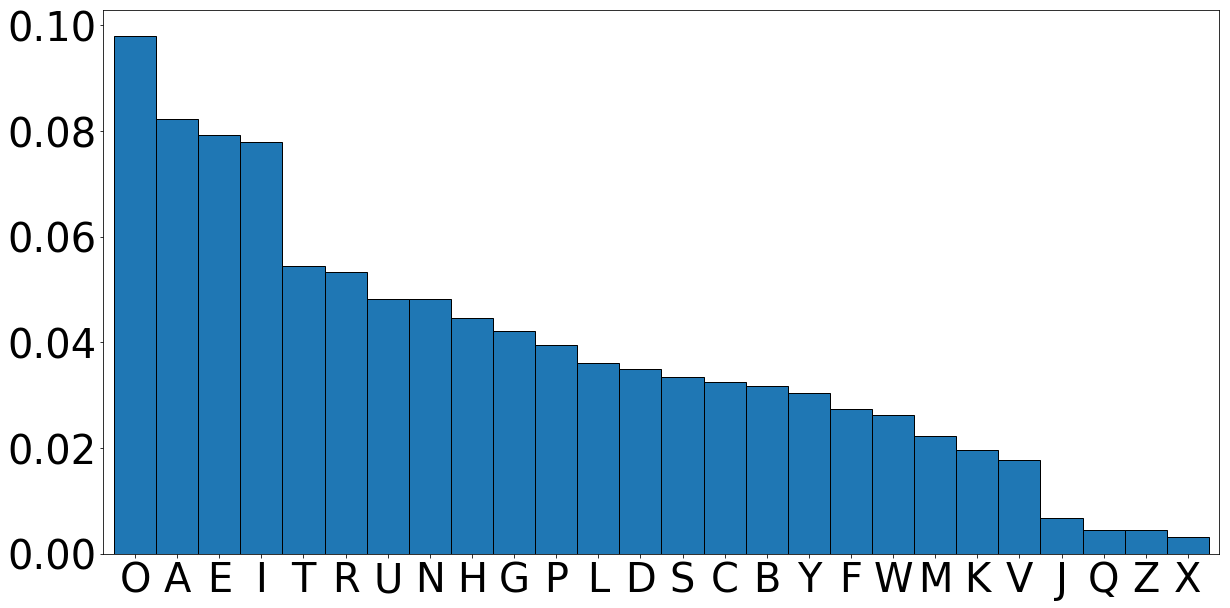

3.814732956333904
3.0233868850810124


In [35]:
print(ngramEntropy(BPTL,1))
FreqPlot(grams,BPTL)
print(ngramEntropy(BPTL,2))
print(ngramEntropy(BPTL,3))

9.856972849398925


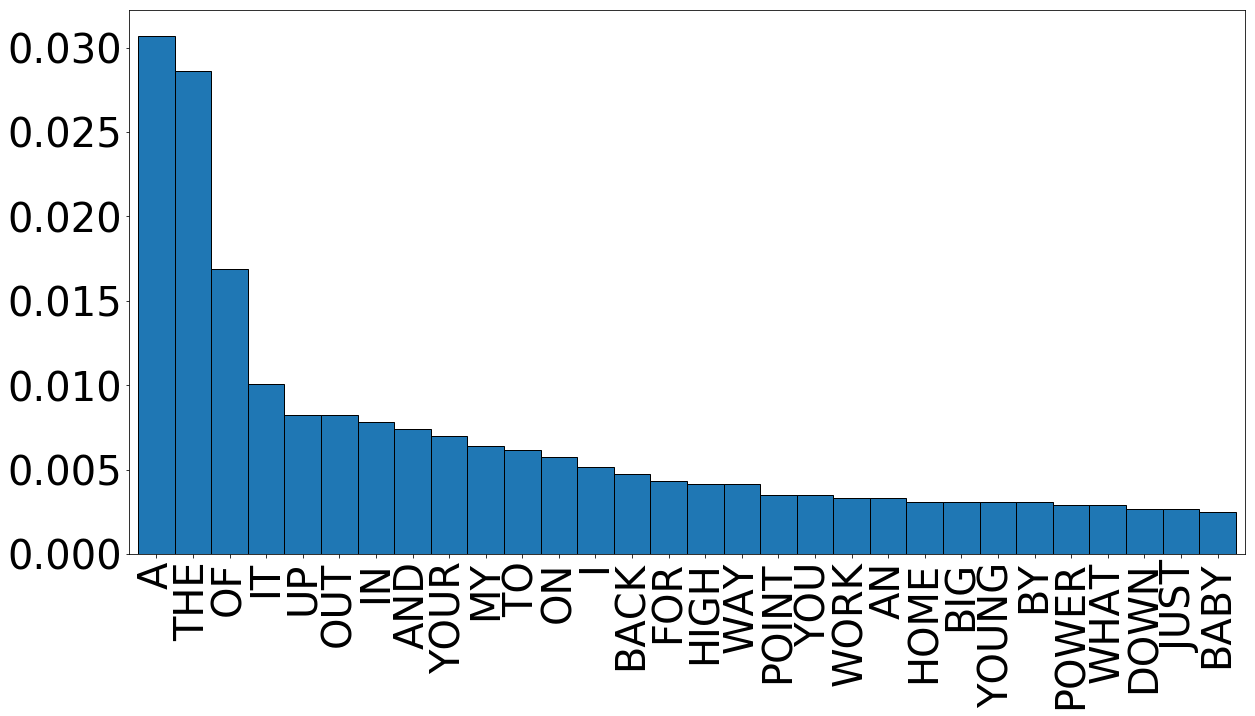

1.803896137102292
0.32503695246995096


In [39]:
print(ngramEntropy(BPTW,1))
FreqPlot(grams,BPTW,turn=90)
print(ngramEntropy(BPTW,2))
print(ngramEntropy(BPTW,3))

Category: Thing
 4.3888861931699


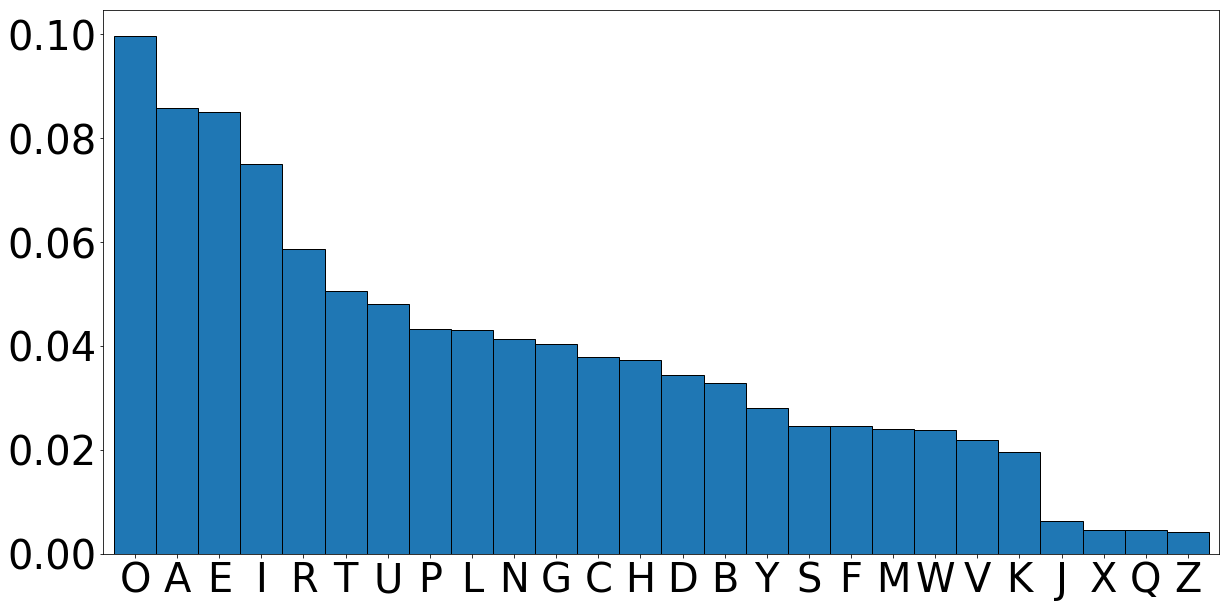

3.8086151754947117
2.6278995646402463

 9.11833945137517


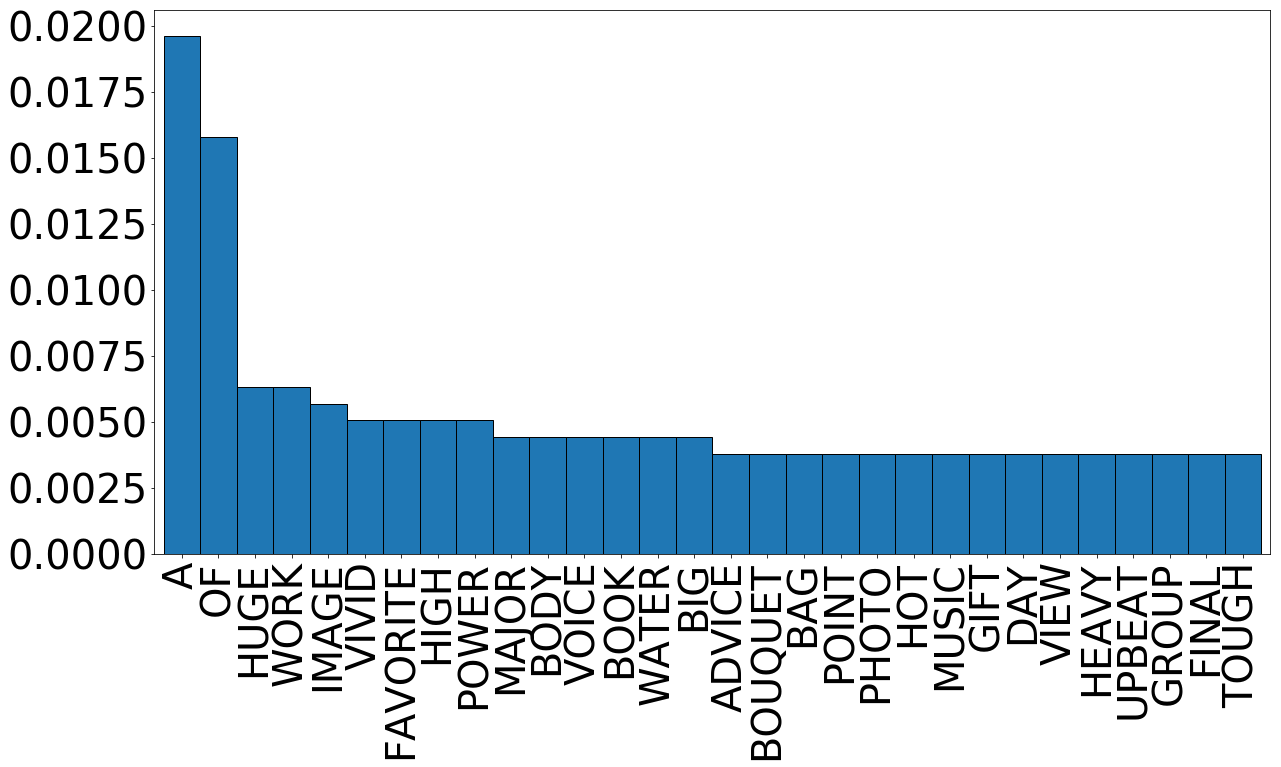

1.0278644413030915
0.23956966554862502 




Category: Phrase
 4.355012857741931


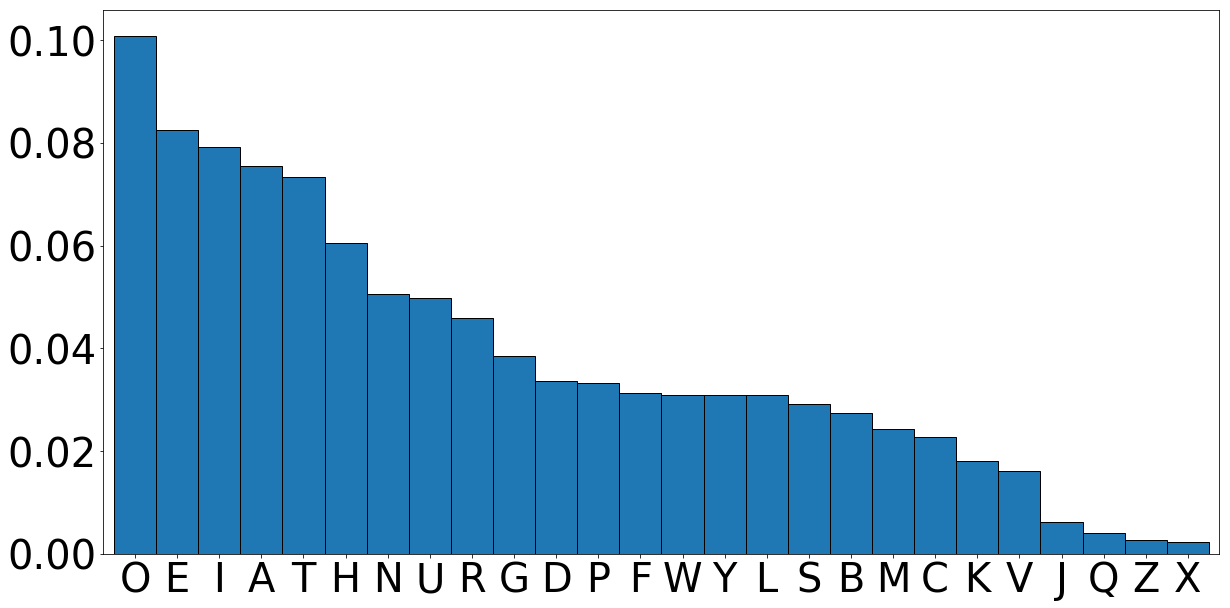

3.6267141838193306
2.4956622628438025

 8.073035225530905


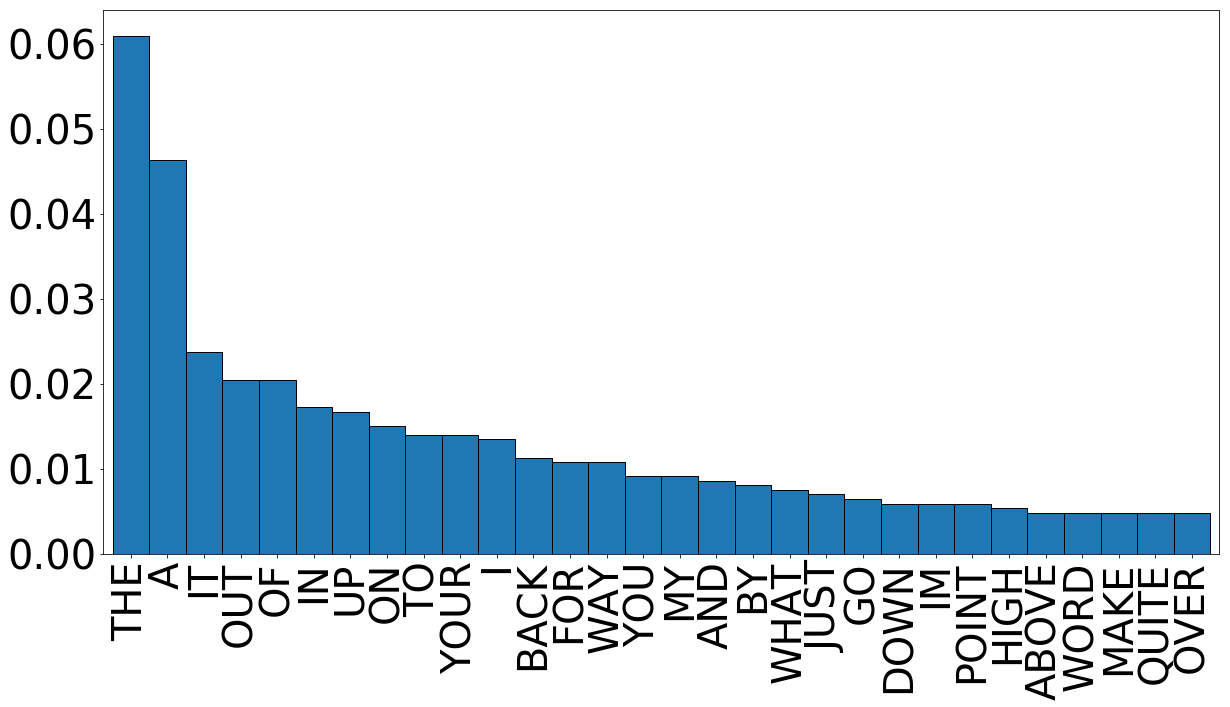

2.045602650865911
0.37502151143567763 




Category: Event
 4.378611069654555


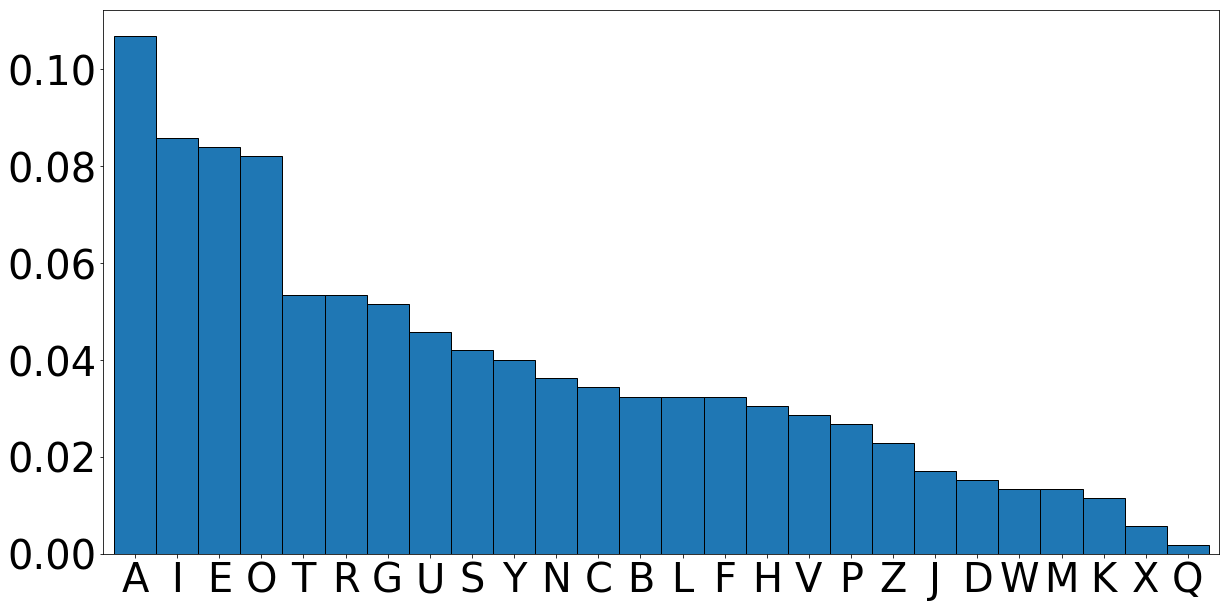

2.9093133808142415
0.8196426639894605

 5.583117064010938


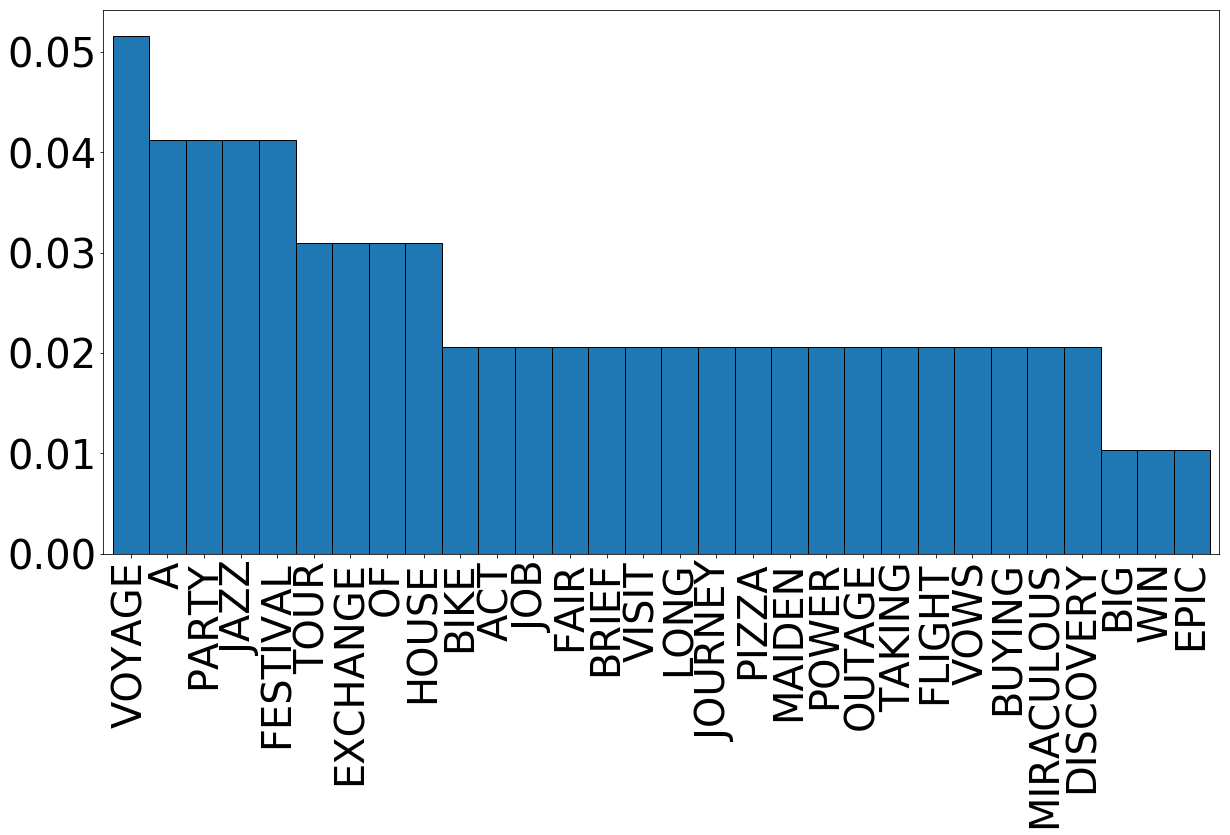

0.6268454367102221
0.2756825812939965 




Category: People
 4.327976940774397


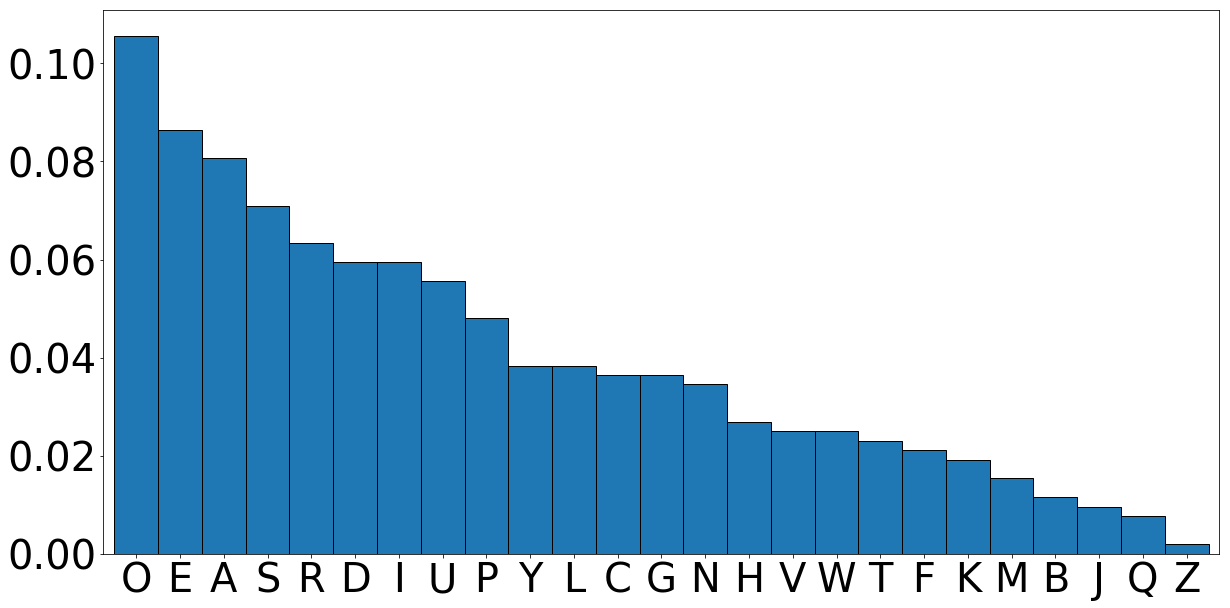

2.7511503128790973
0.8966066166099076

 5.322261714435613


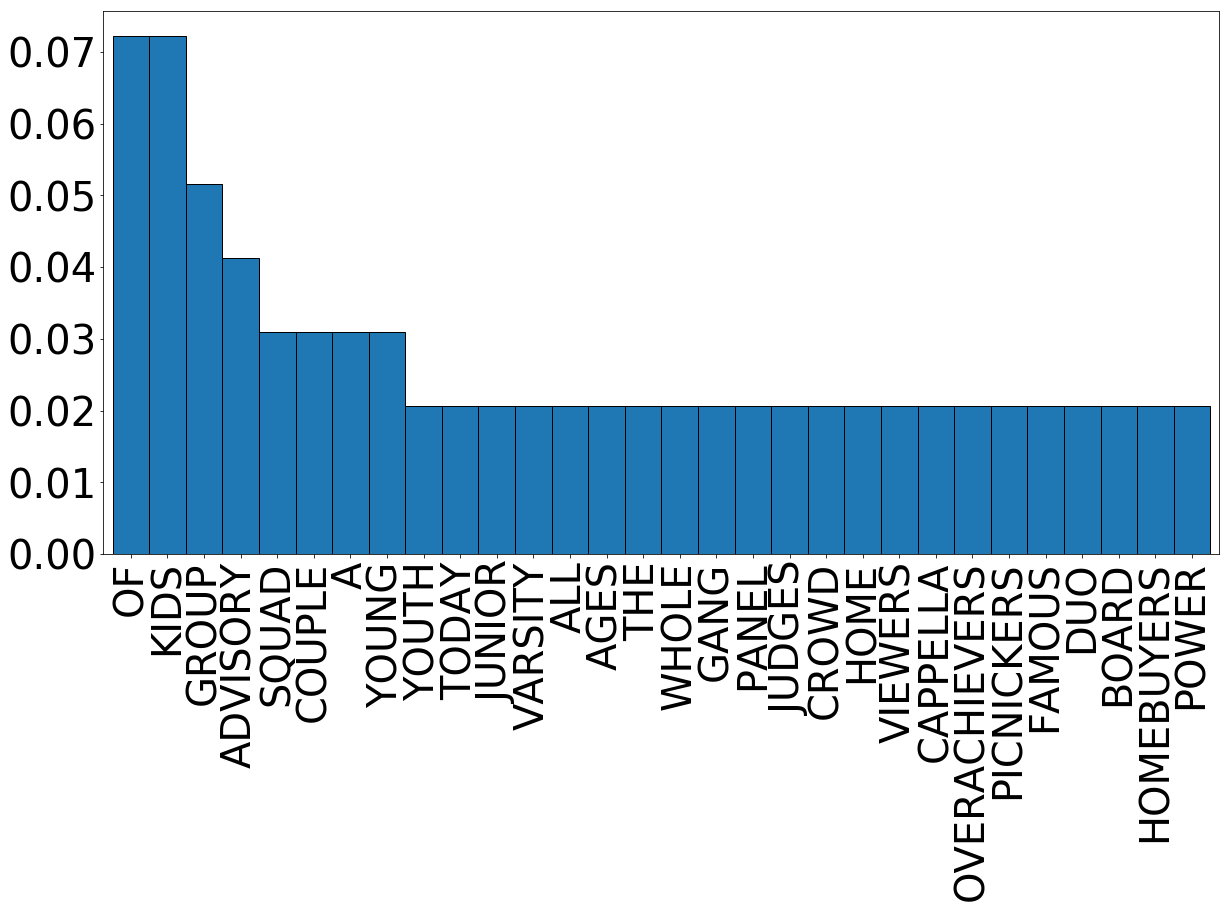

0.8252007862855504
0.23291942339925797 




Category: What Are You Doing?
 4.264371821037198


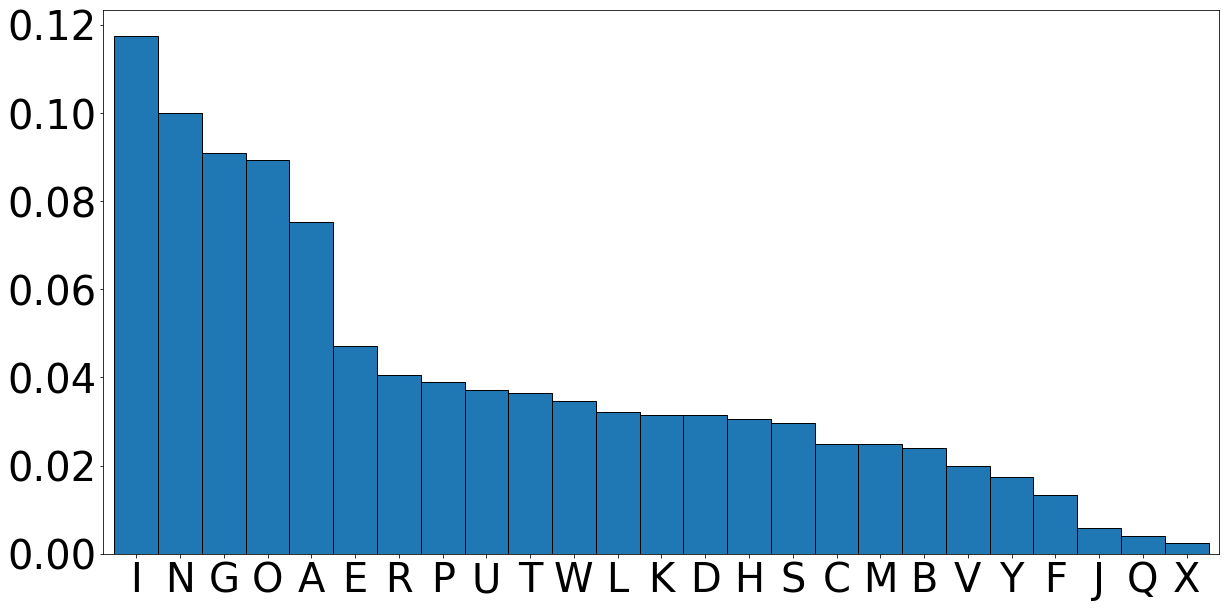

2.826703090995337
1.2336870517263325

 6.2693931688270395


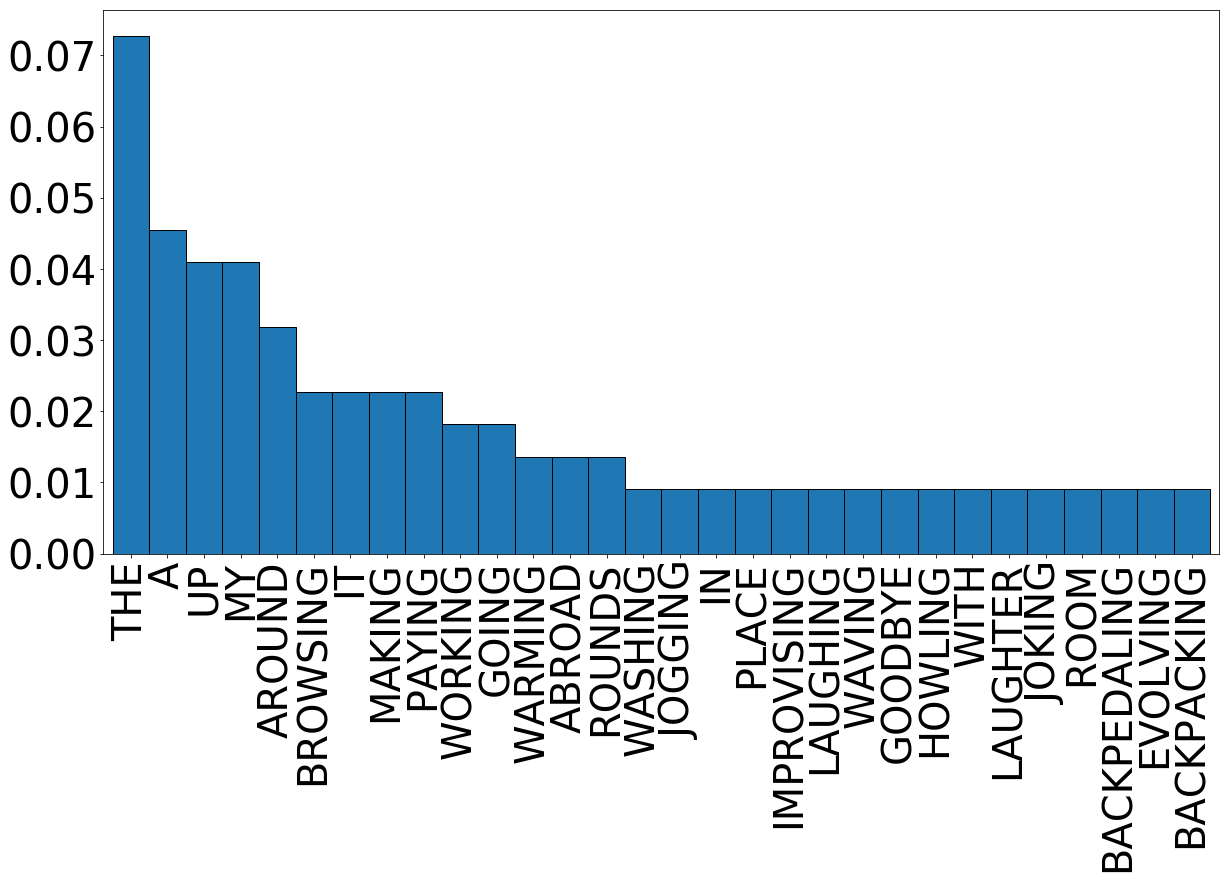

1.0132731715466599
0.23434877567769852 




Category: Living Thing
 4.225243485105869


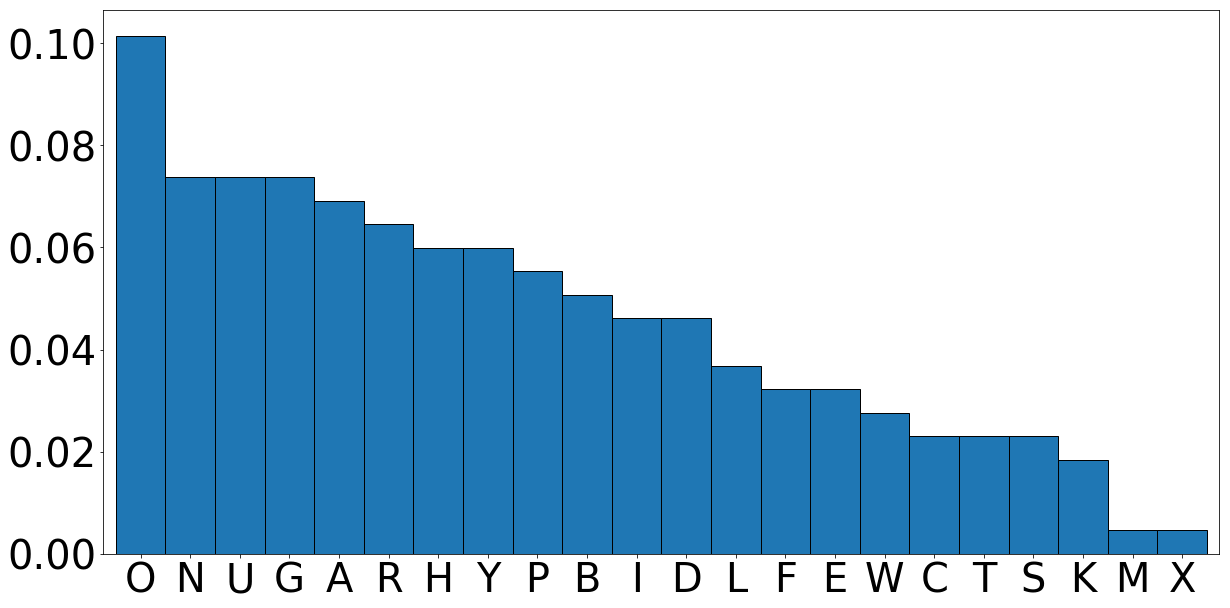

2.4117631002989426
0.49125969434676087

 4.722966879142467


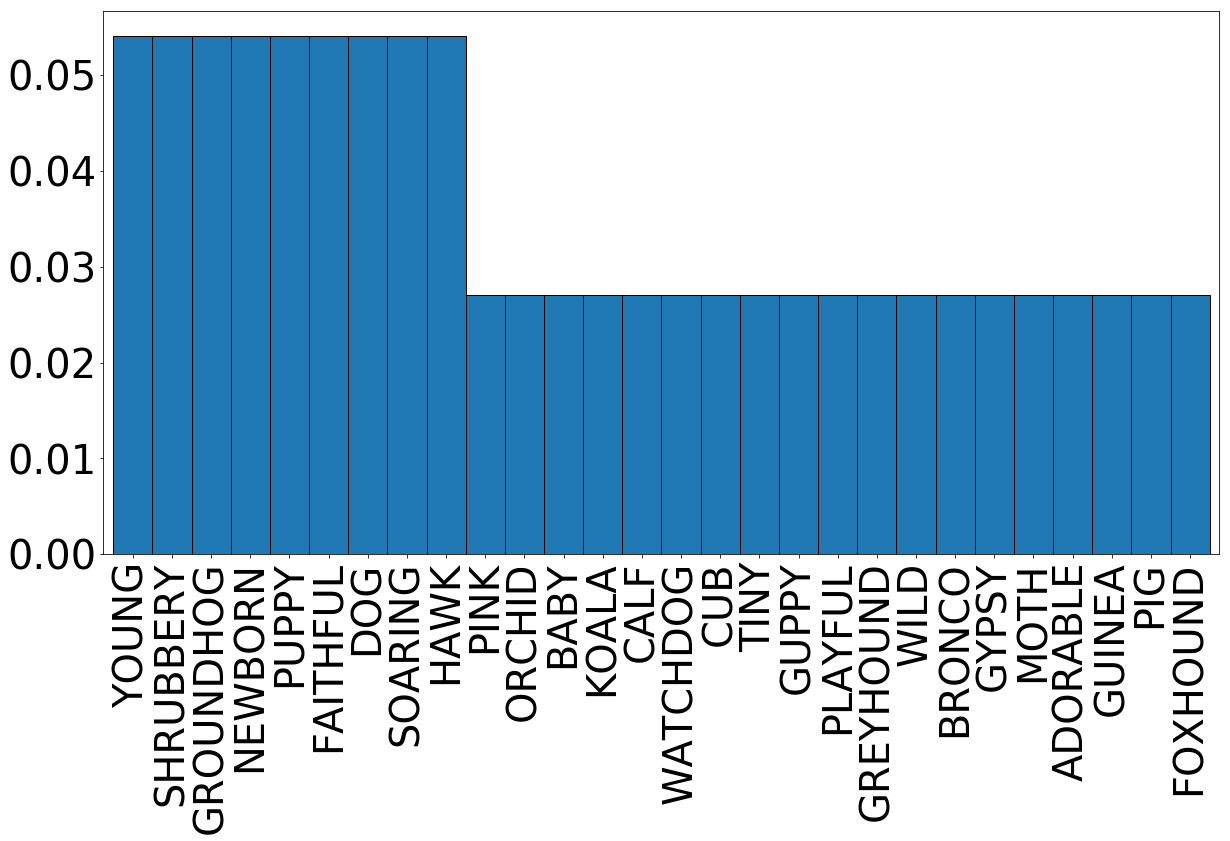

0.2247359000776221
0.06729452343916192 




Category: Things
 4.381507099642248


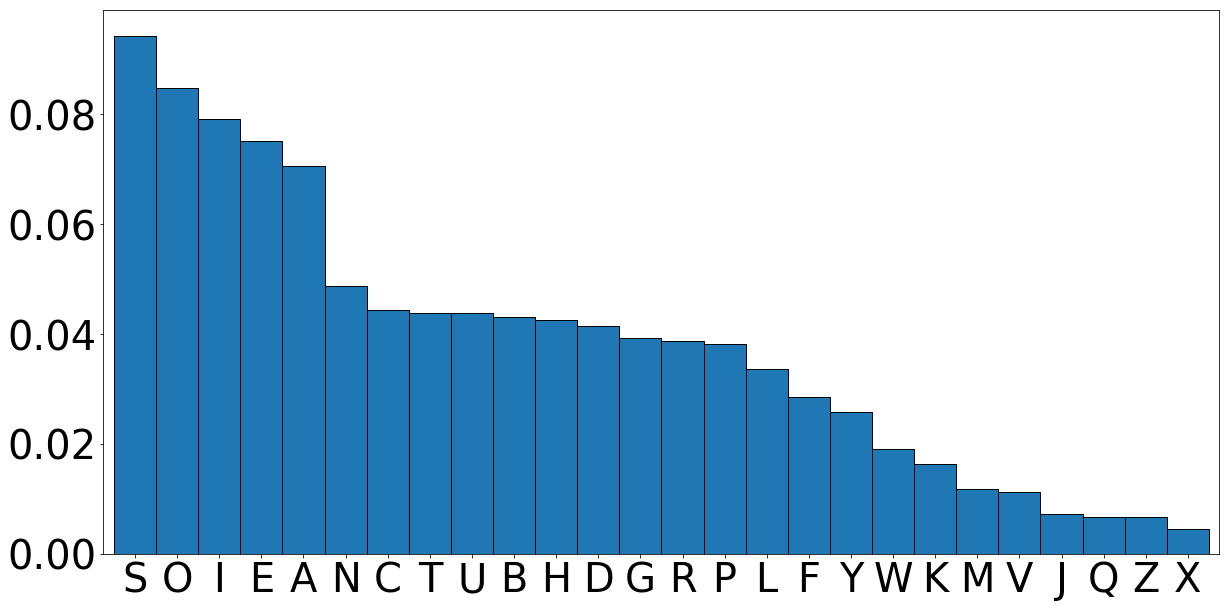

3.440609847498423
1.581181333099257

 7.182722199009725


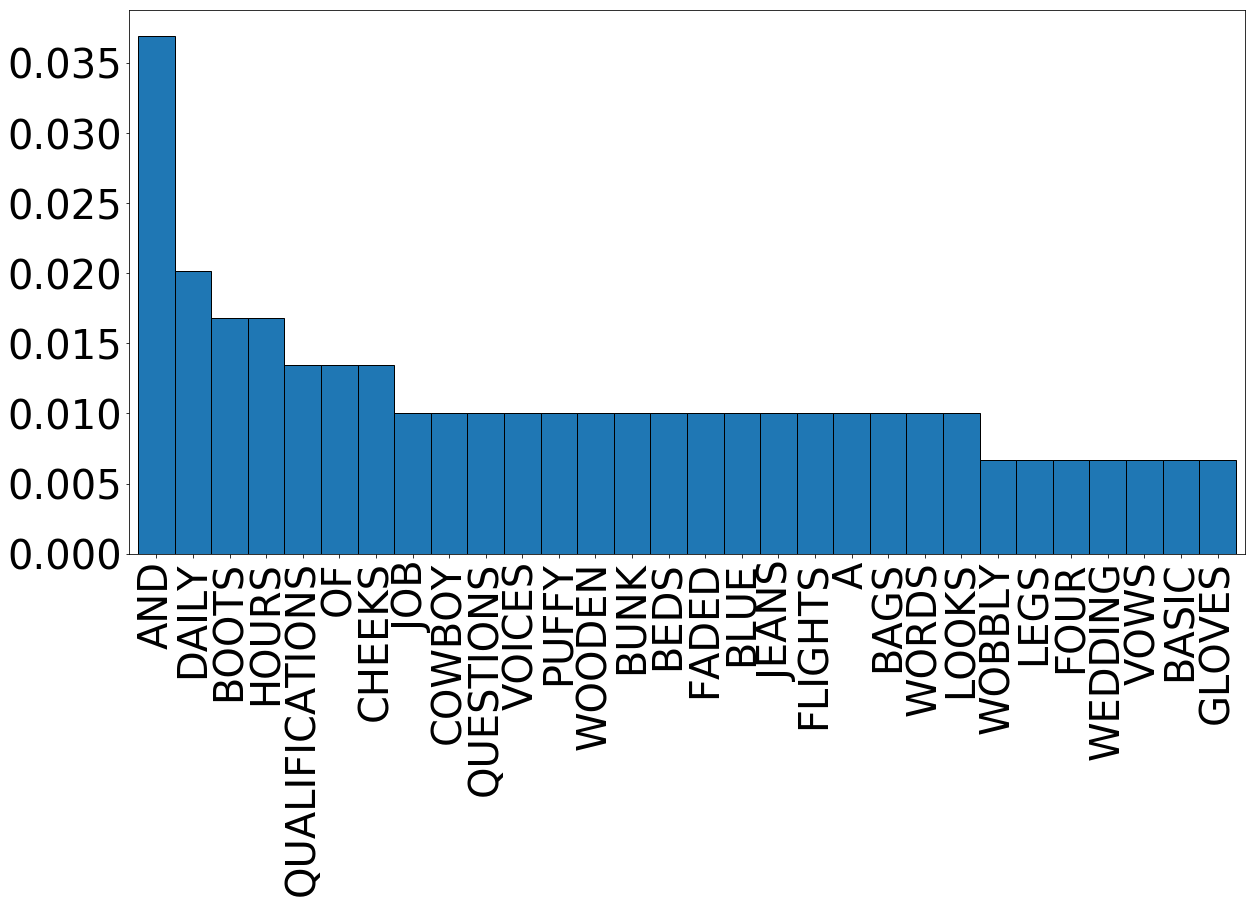

0.6190402719157129
0.27421192509426784 




Category: Place
 4.397814224494082


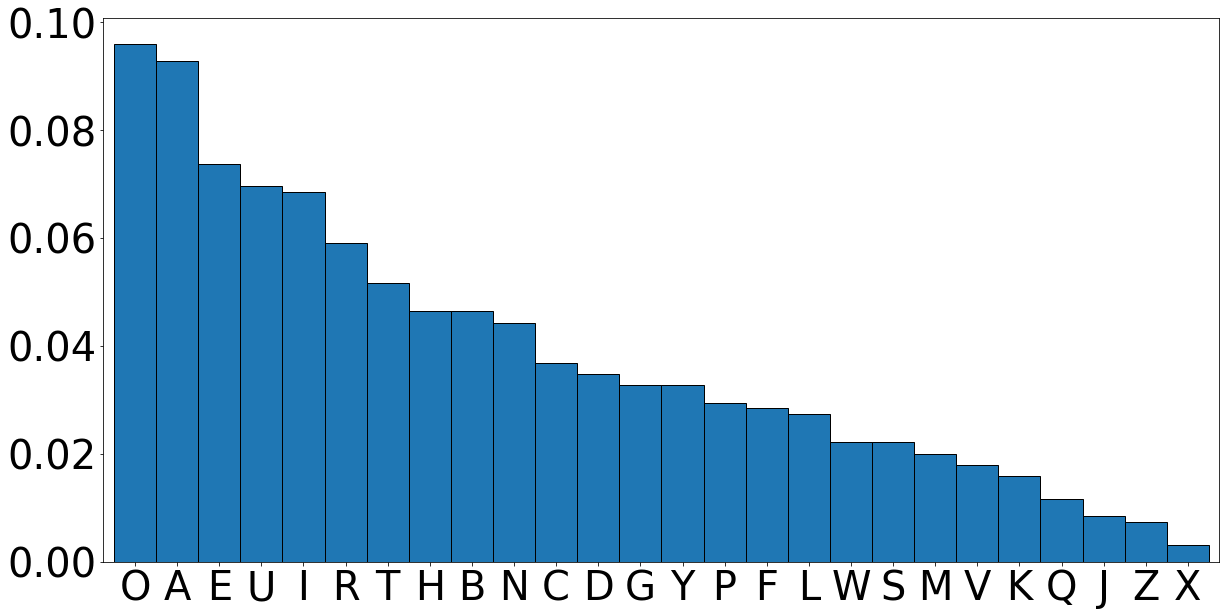

3.0616740156796096
1.2331734630351625

 6.335938768983119


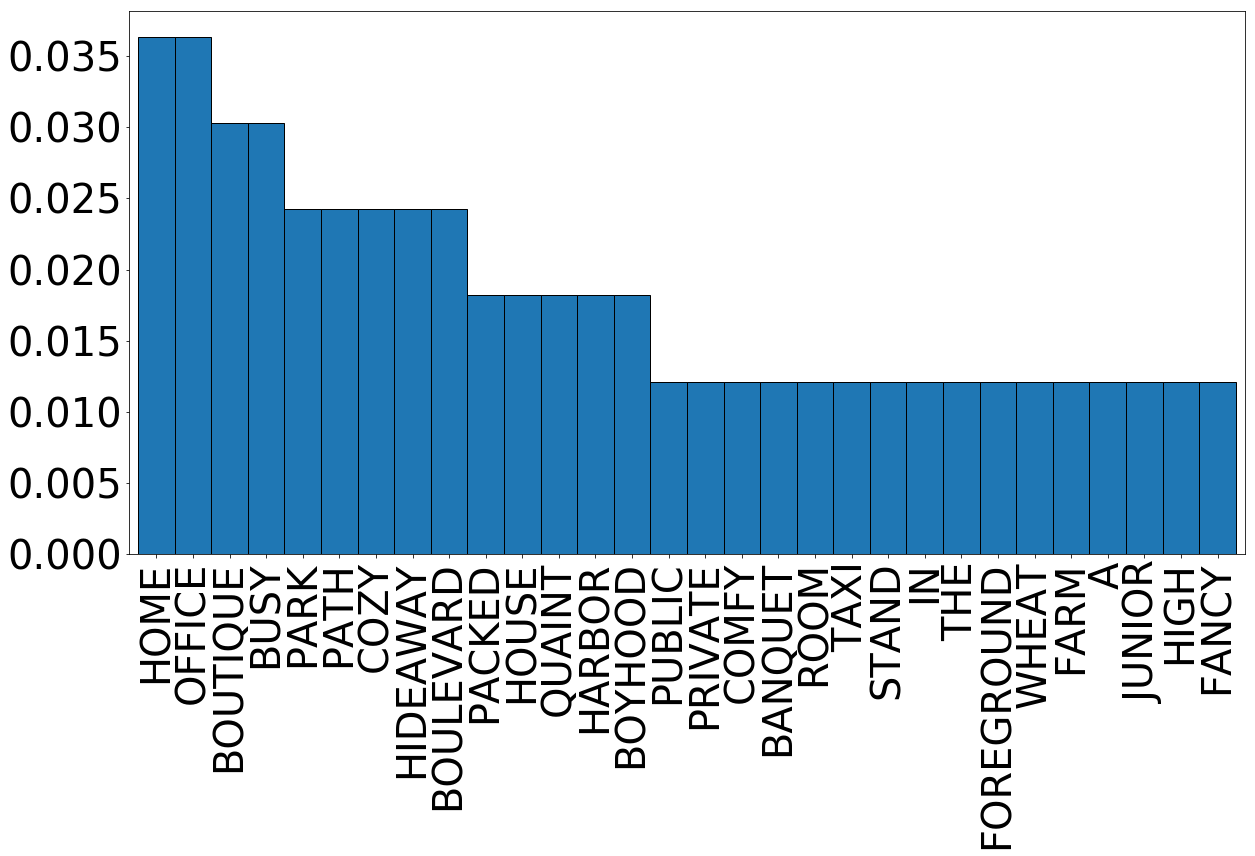

0.6831389978037159
0.2314908782418066 




Category: Person
 4.35297115973877


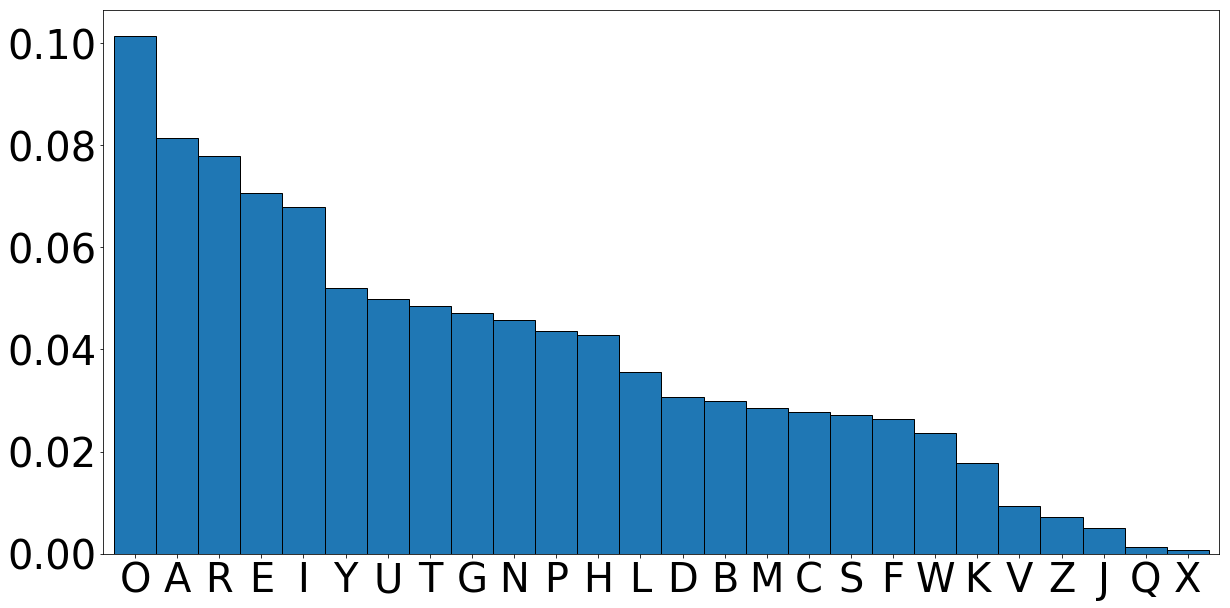

3.29765142786031
1.4922965184954808

 6.661237067770378


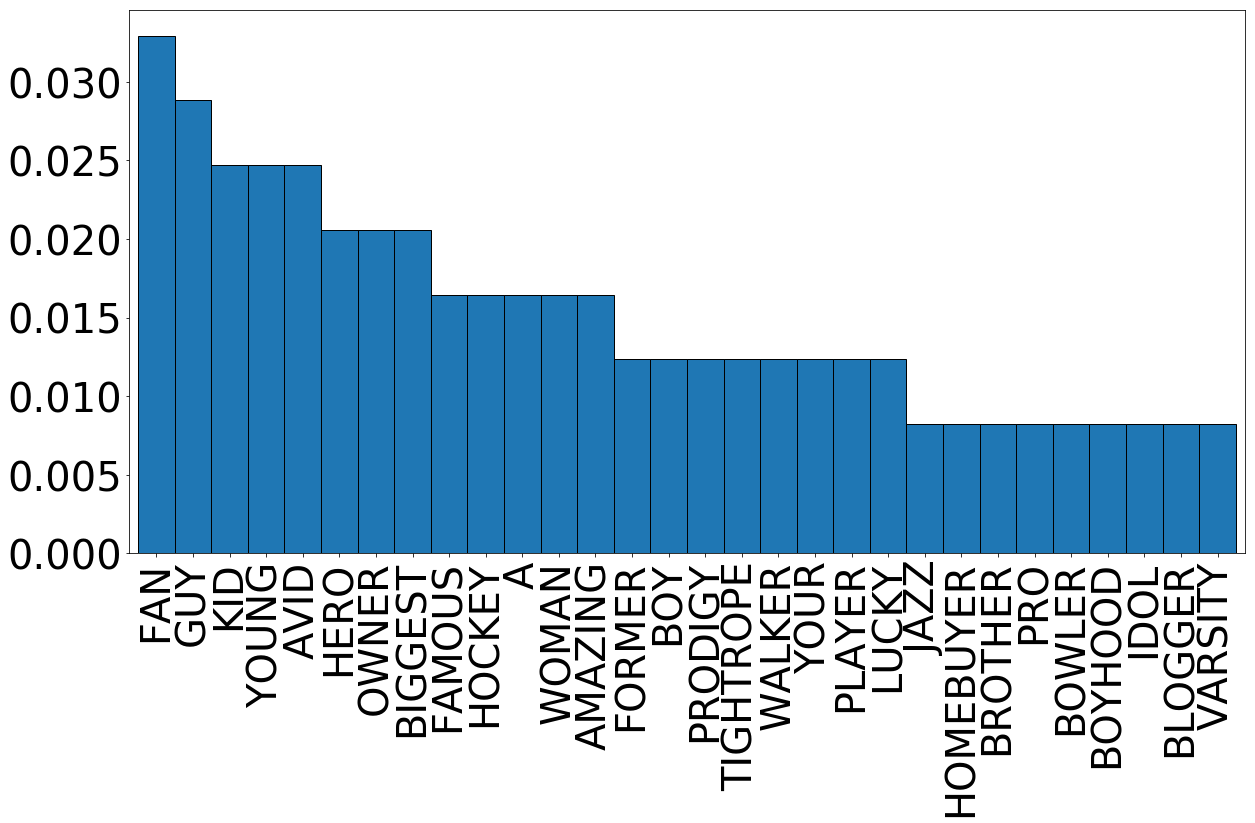

0.7560390703916027
0.32337346775959547 




Category: Food & Drink
 4.395596532392318


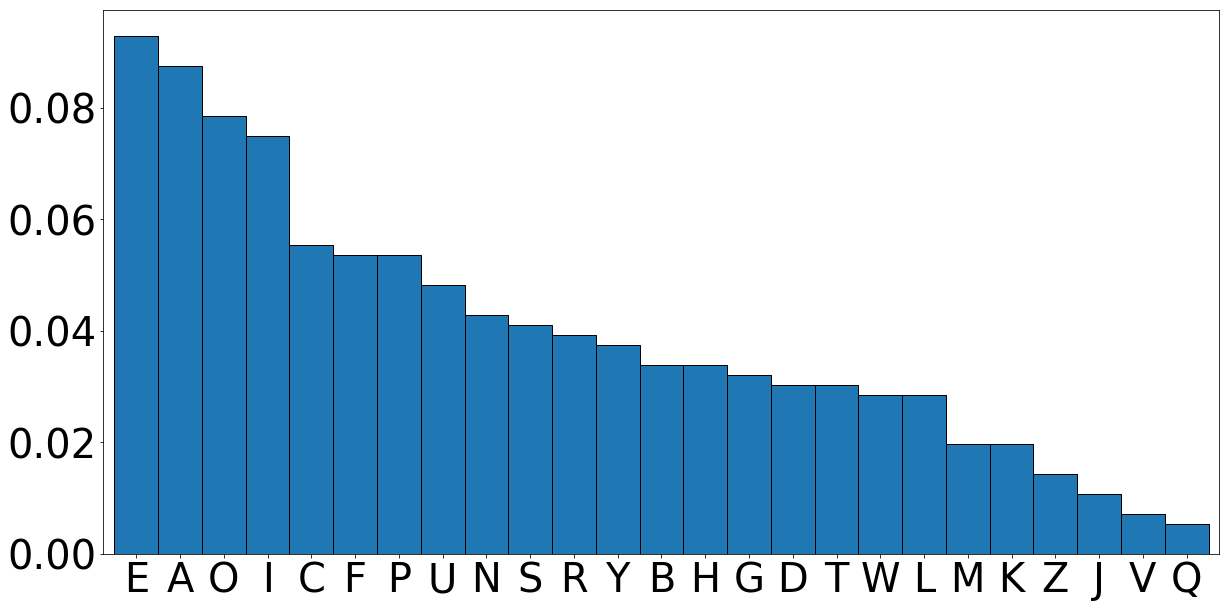

2.824844934566598
0.9023195541171272

 5.6388663720458245


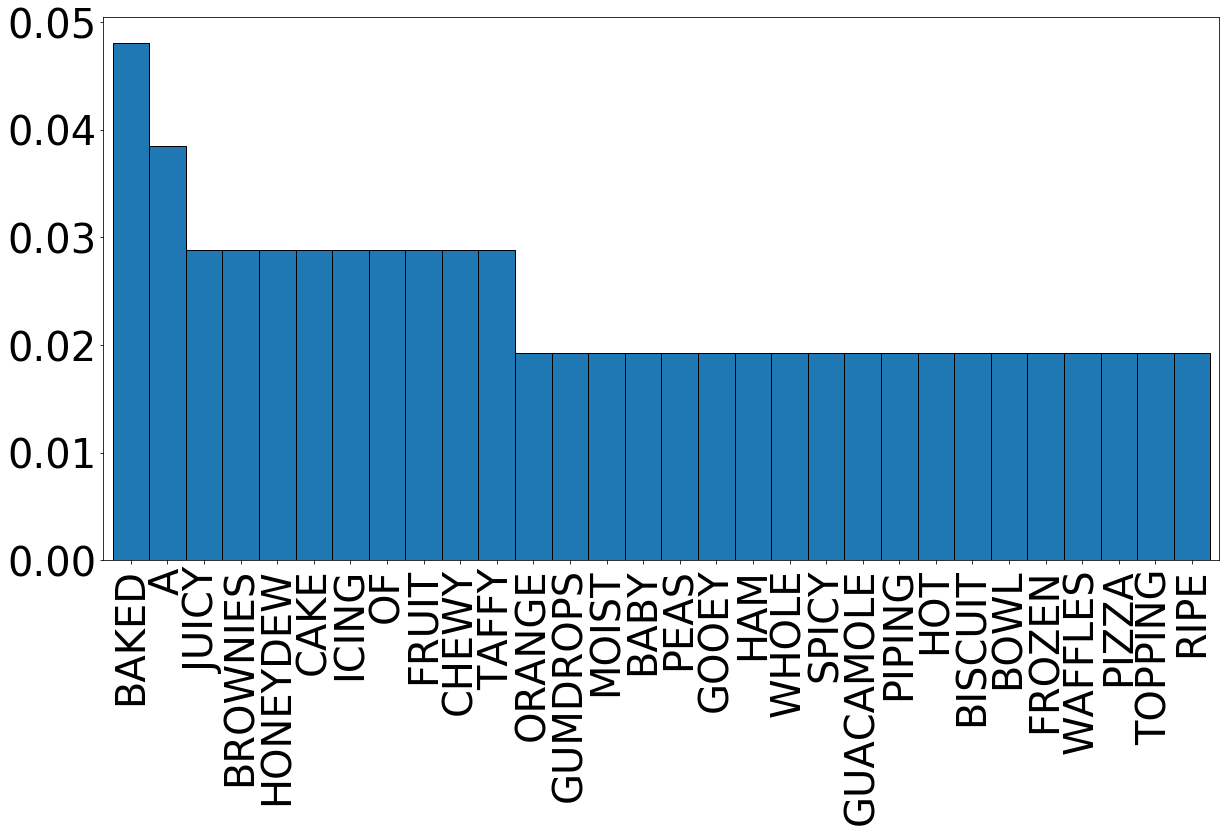

0.5863742036390873
0.2903220211885551 




Category: Places
 3.2776134368191165


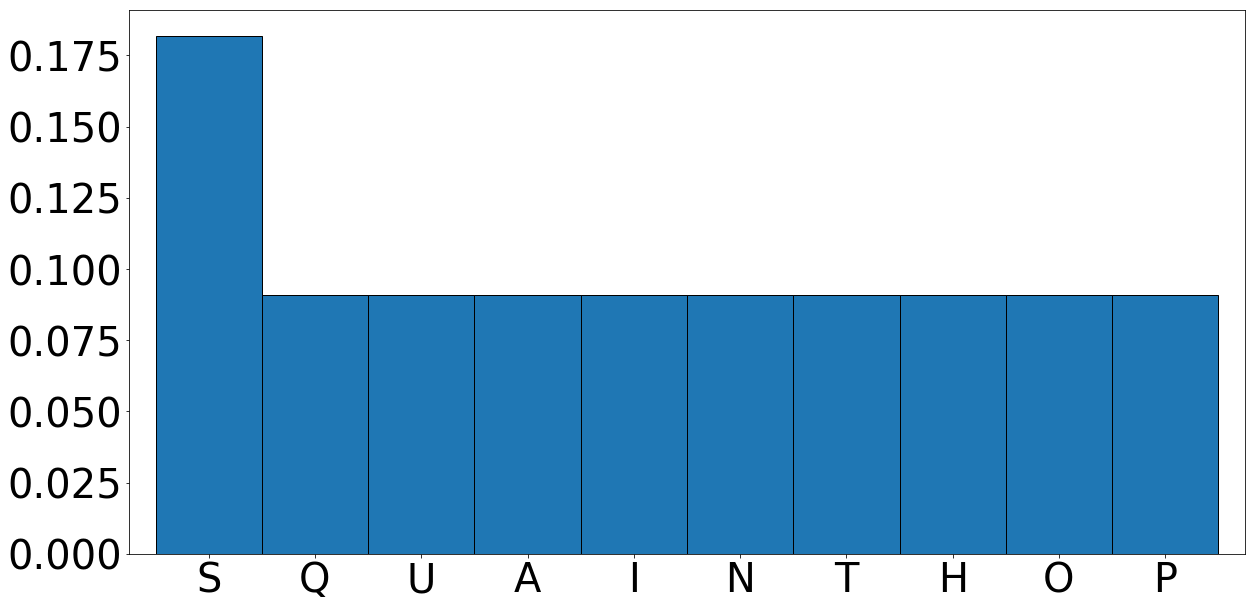

0.04431465806824575
-0.15200309344505014

 1.0


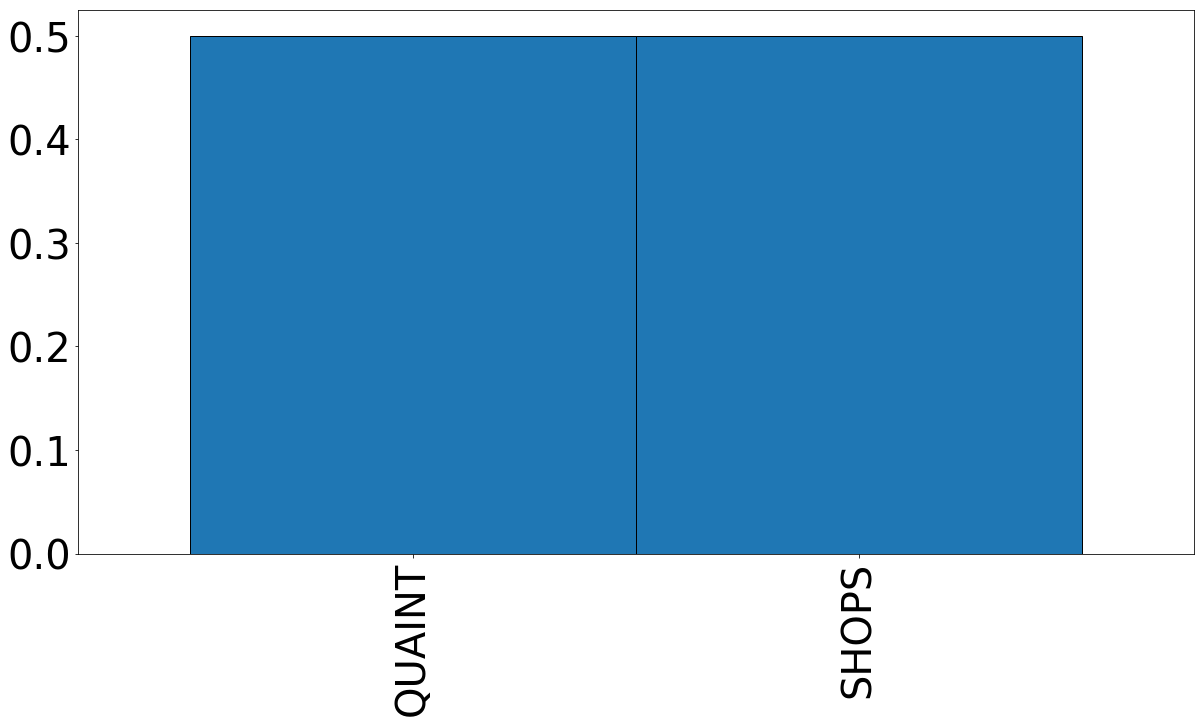

-1.0
0.0 




Category: Around the House
 4.19047389627217


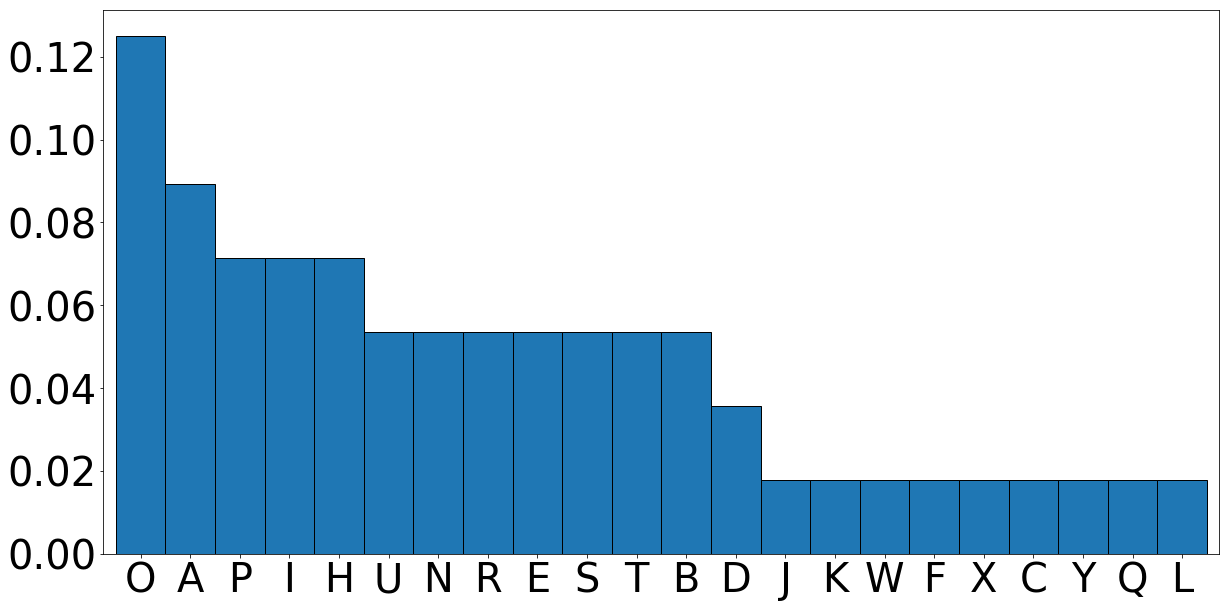

1.4090676354343055
0.11830893341995524

 3.459431618637298


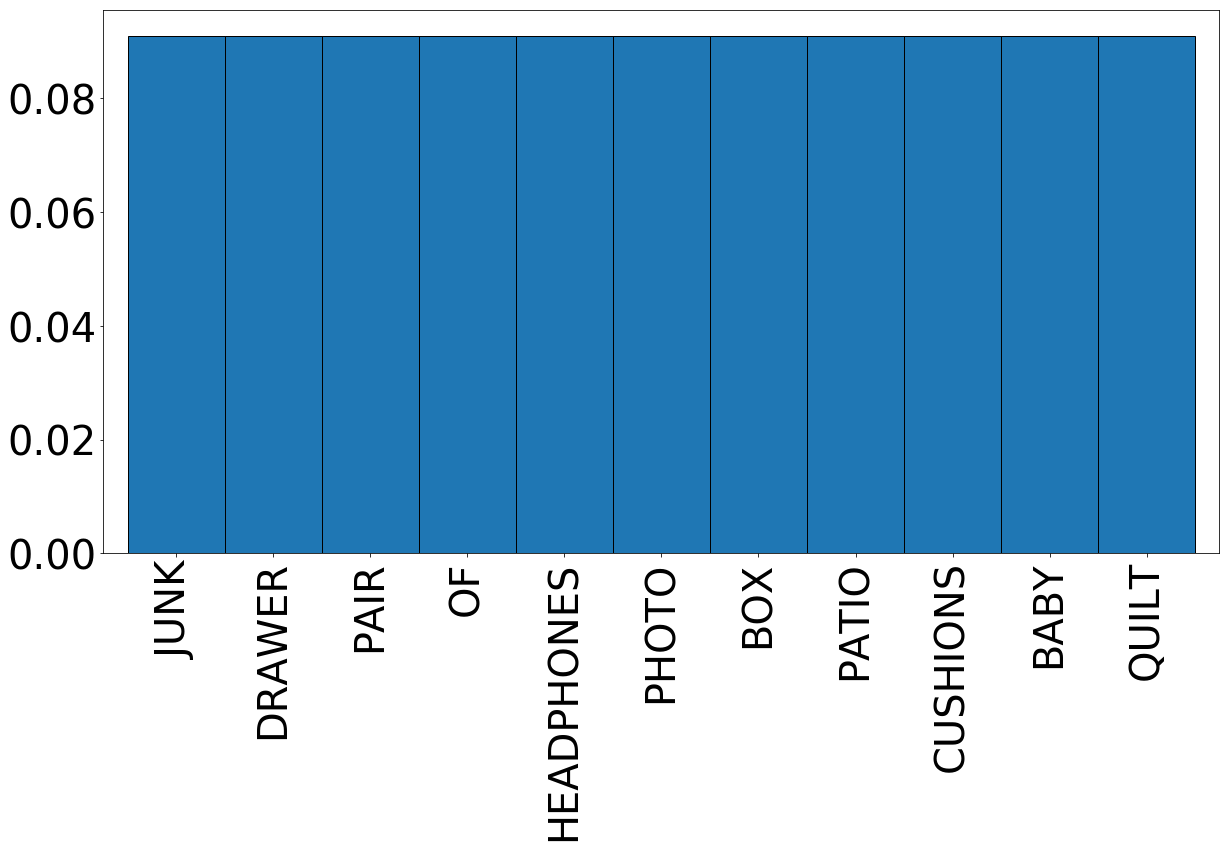

-0.1375035237499363
-0.15200309344505014 




Category: Fun & Games
 4.140610153529277


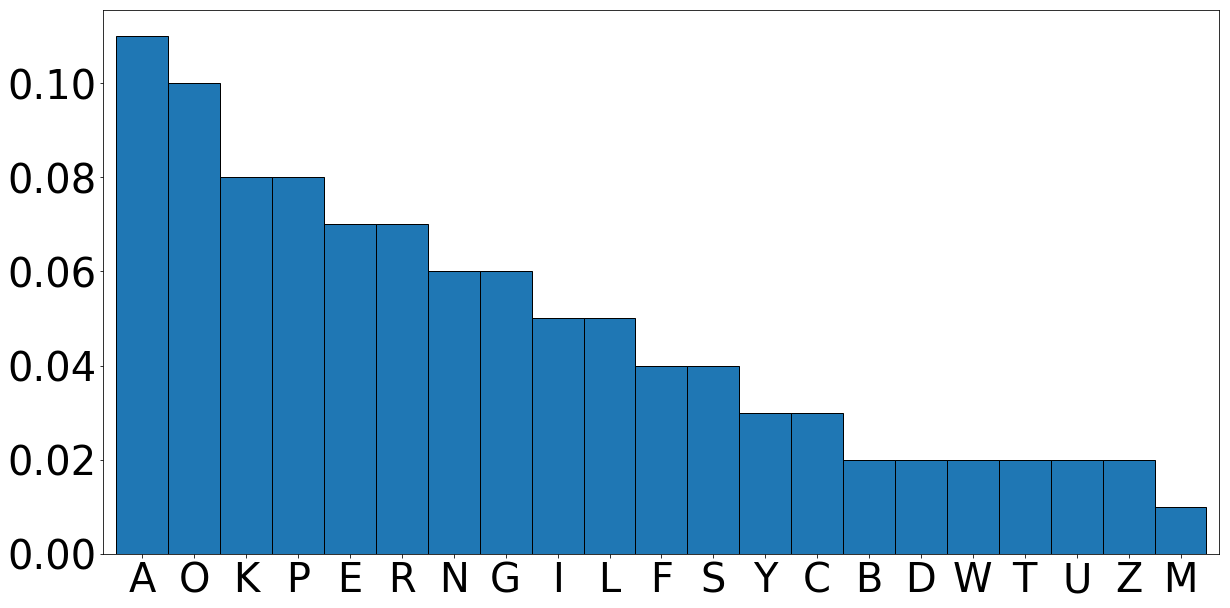

1.9177431835909373
0.38538826717701236

 3.969815782426811


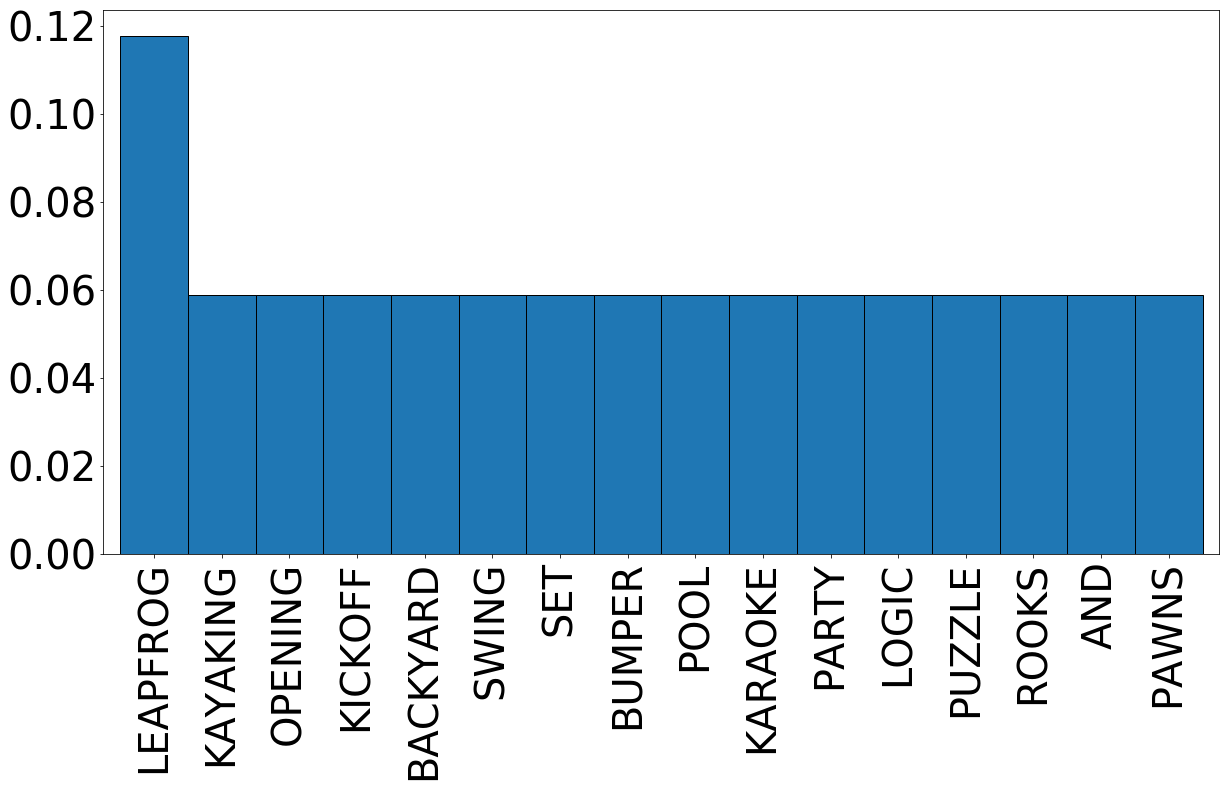

0.030184217573188676
-0.09310940439148219 




Category: Show Biz
 3.9372599061694675


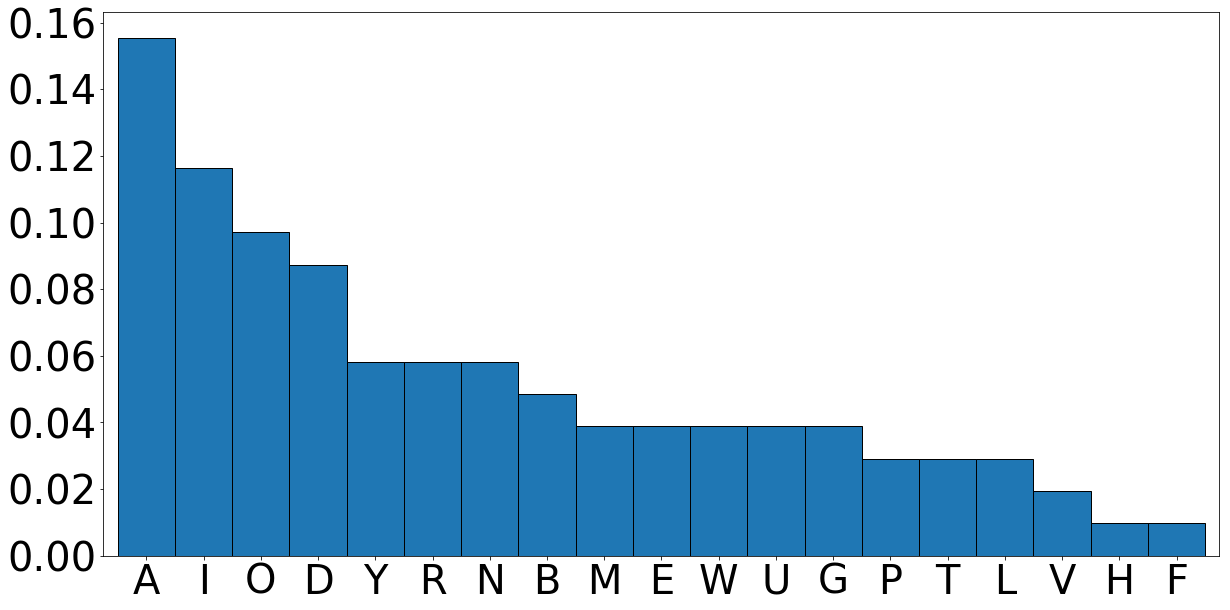

1.6061603819189738
0.12168463502177695

 3.202819531114783


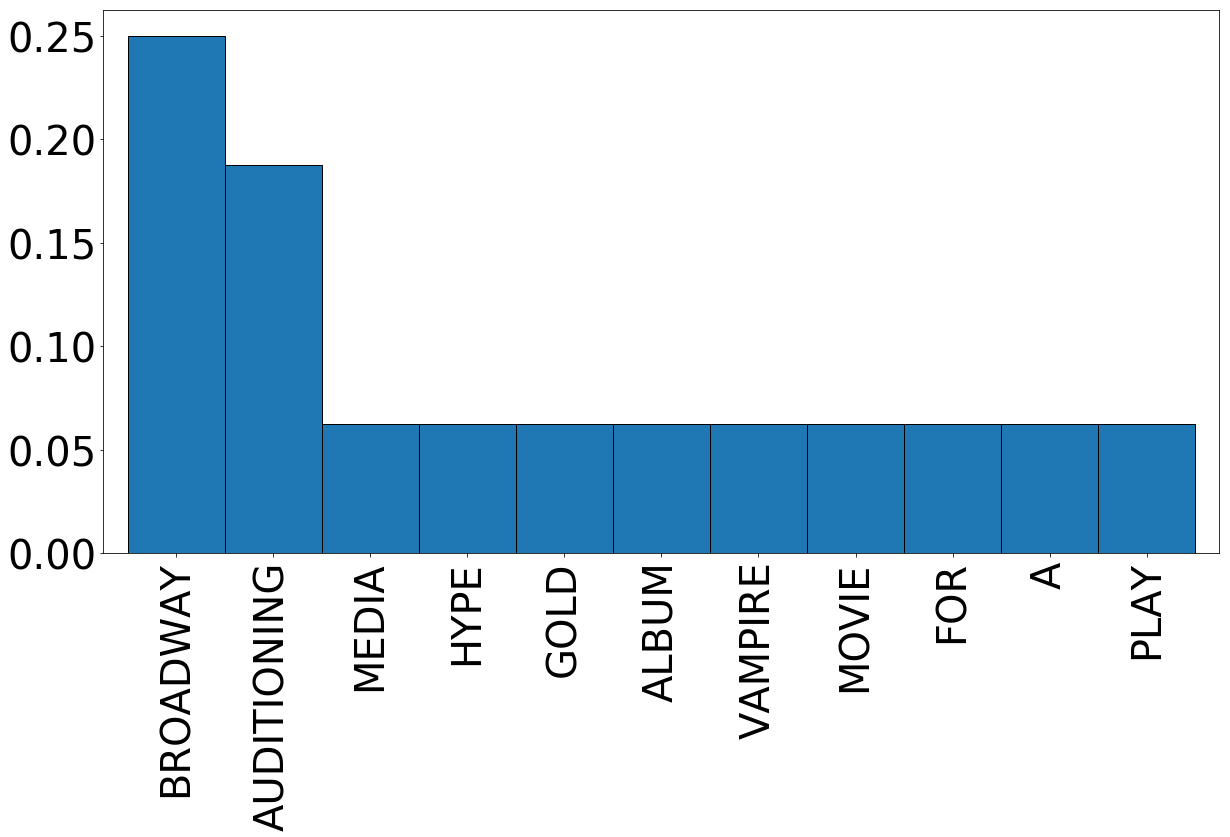

0.3870785643495034
0.07459968373617498 




Category: Living Things
 4.090122589337524


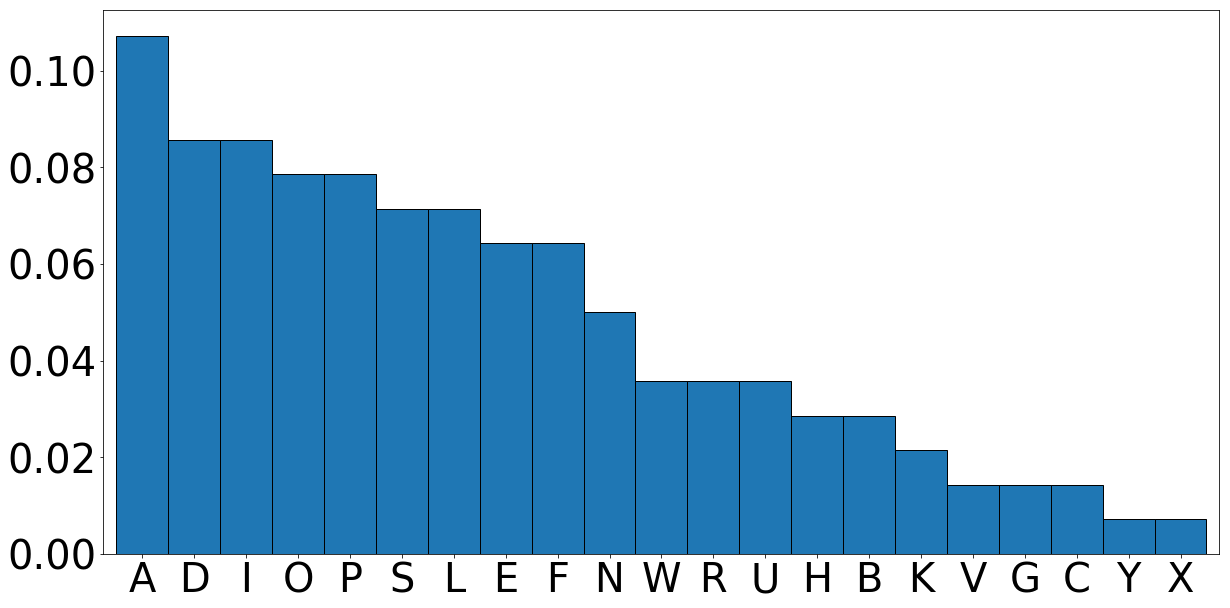

2.0626043645097463
0.4285881732050777

 4.163856189774723


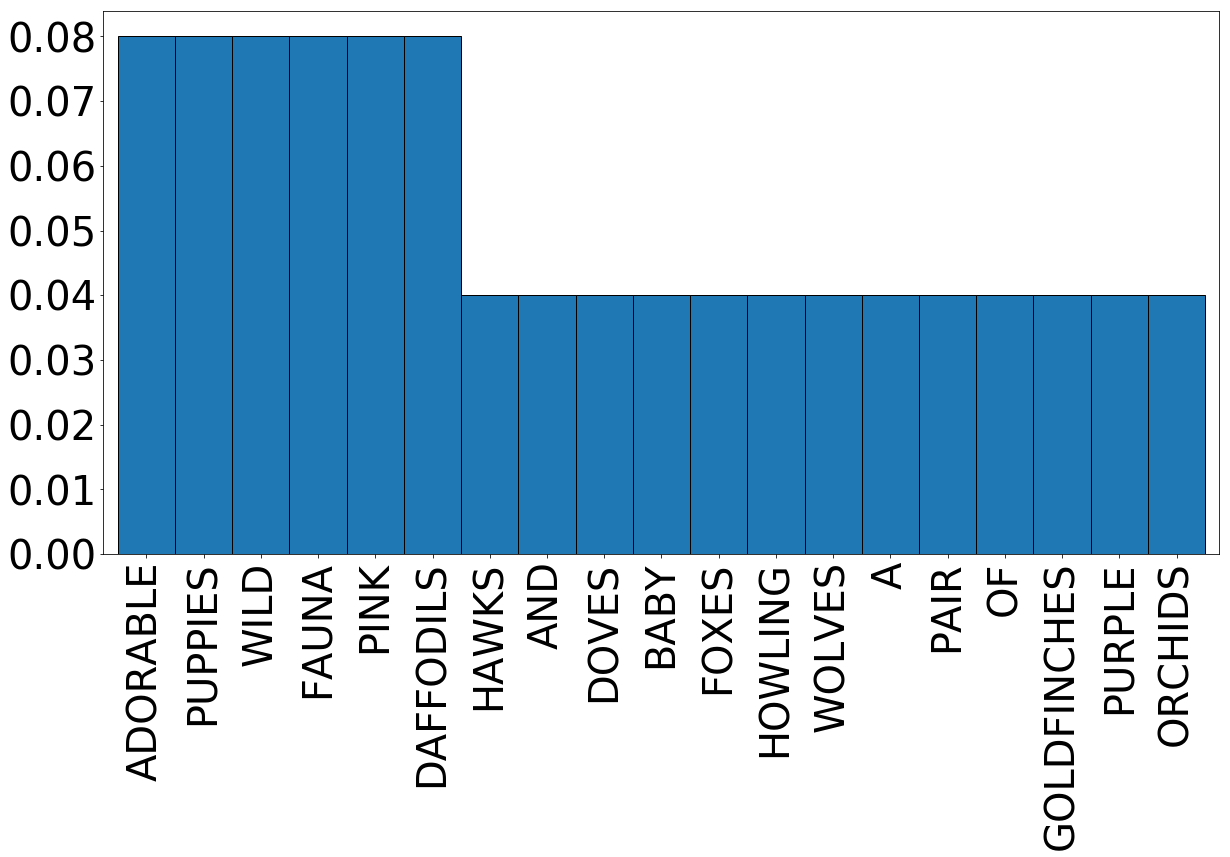

0.17110631094643172
0.18859945533585665 




Category: Quotation
 3.0957952550009344


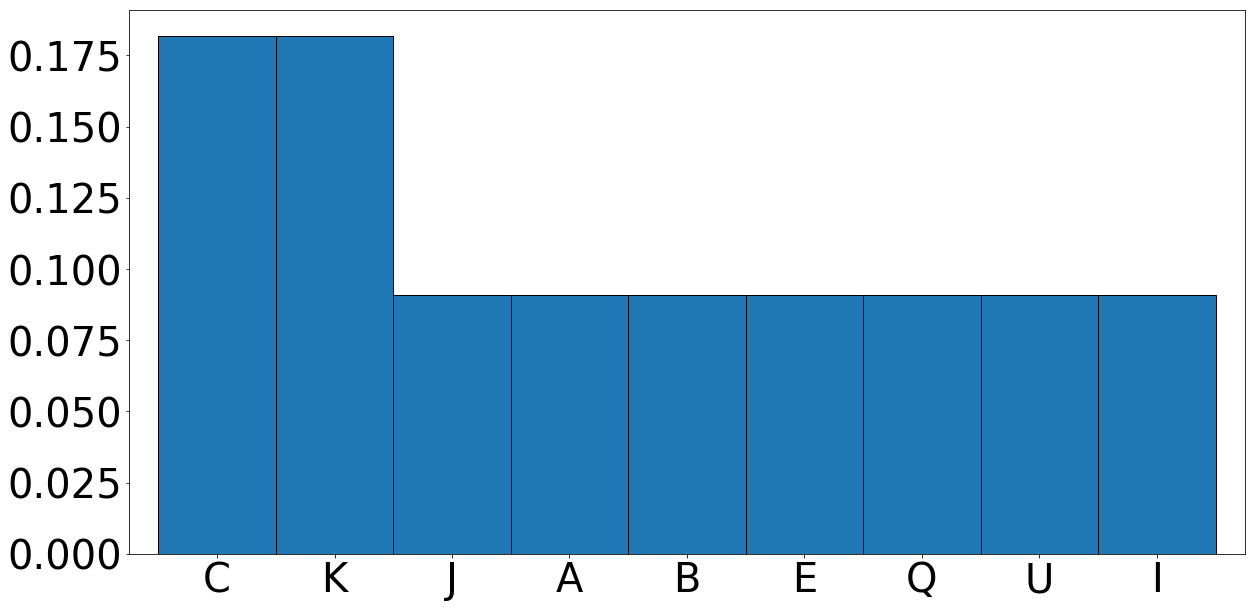

0.15366502492068312
0.17246781496574445

 1.584962500721156


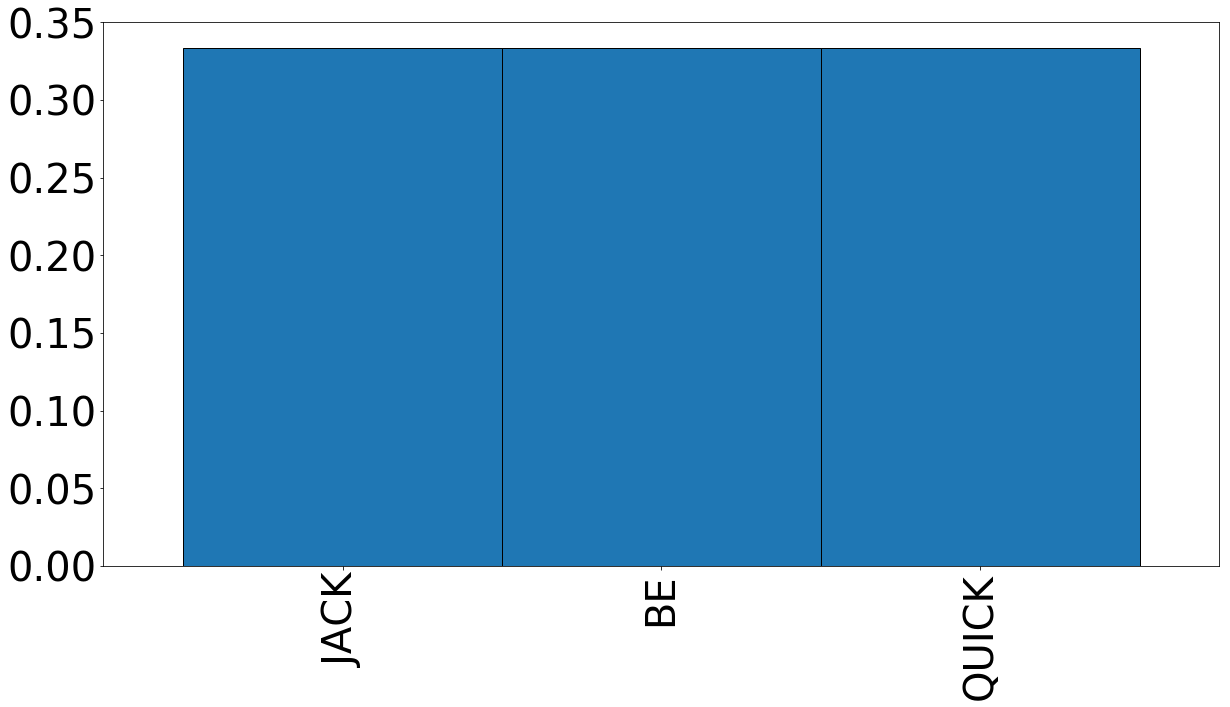

-0.06303440583379405
-0.021928094887362137 




Category: Occupation
 4.0086398245160675


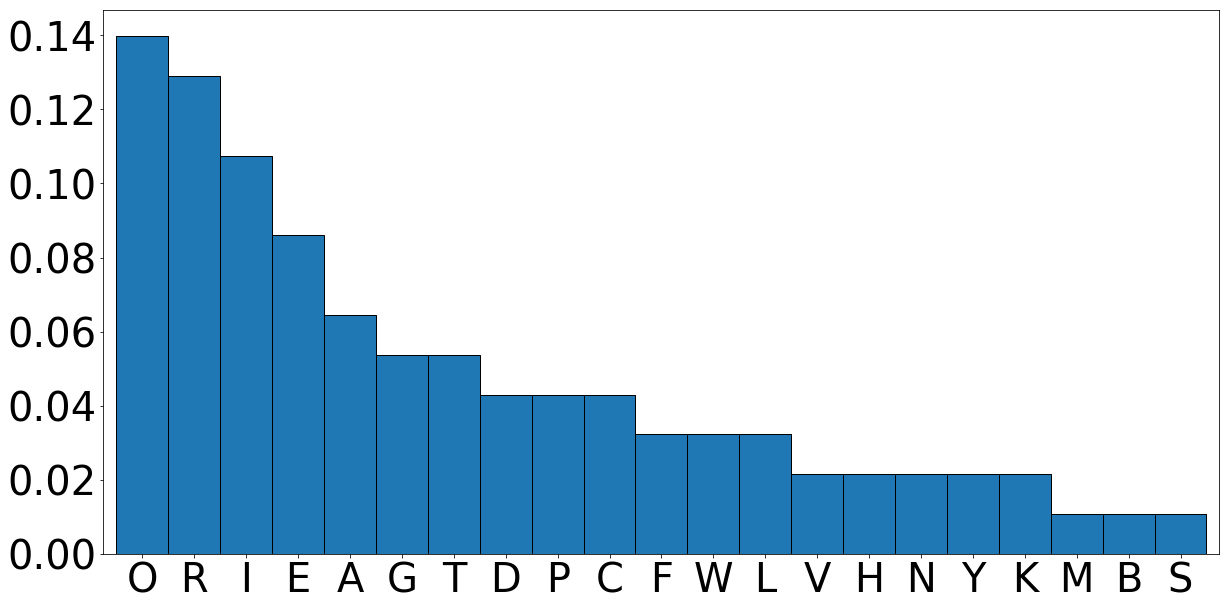

1.6196555230996412
0.28609269917640767

 2.9182958340544896


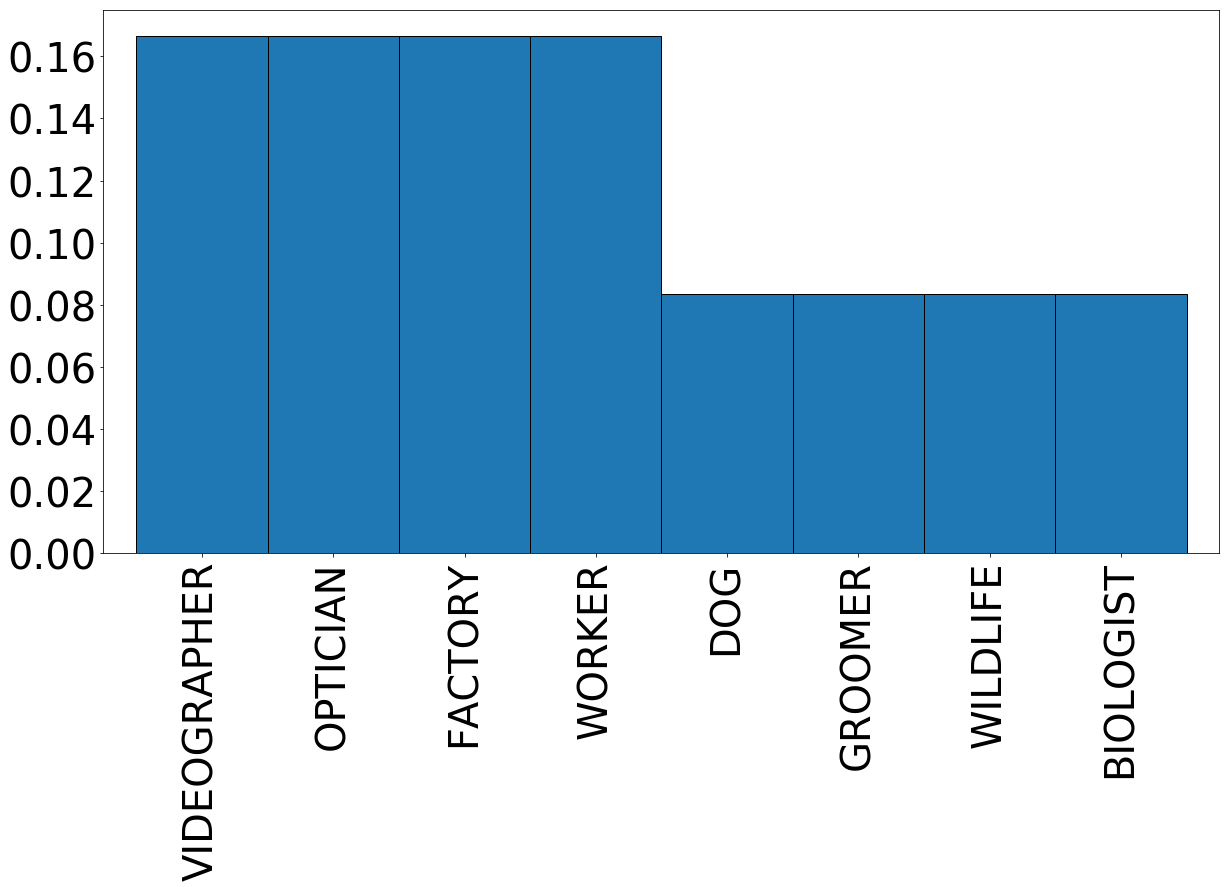

0.35931760276462654
0.04431465806824575 




Category: On the Map
 4.074049154264836


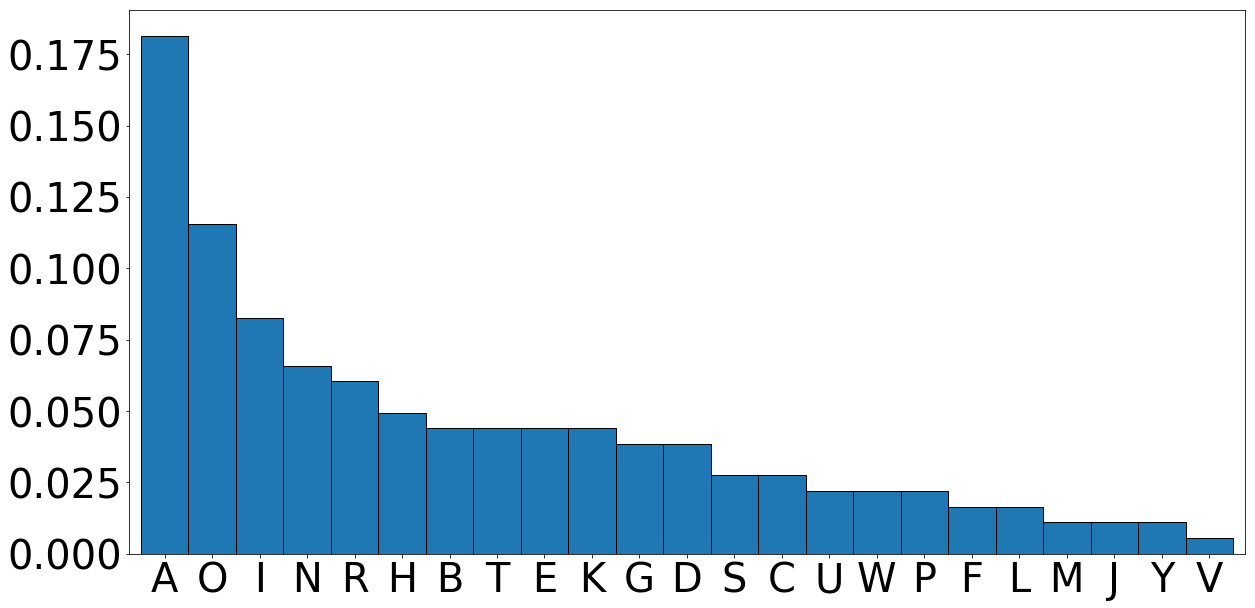

2.4351877552153227
0.4470252315352269

 4.160704752887782


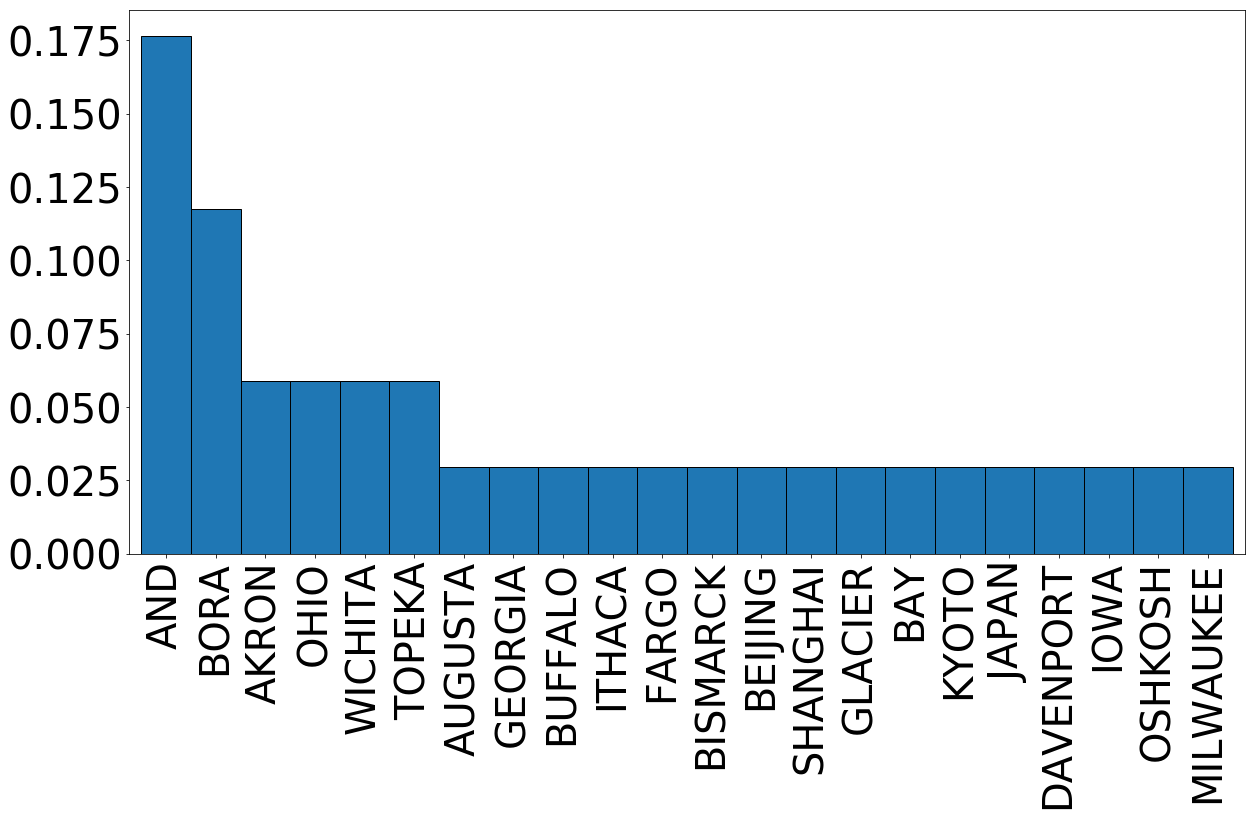

0.6412651240464312
0.13553012306578746 




Category: What Are You Wearing?
 4.167441376692571


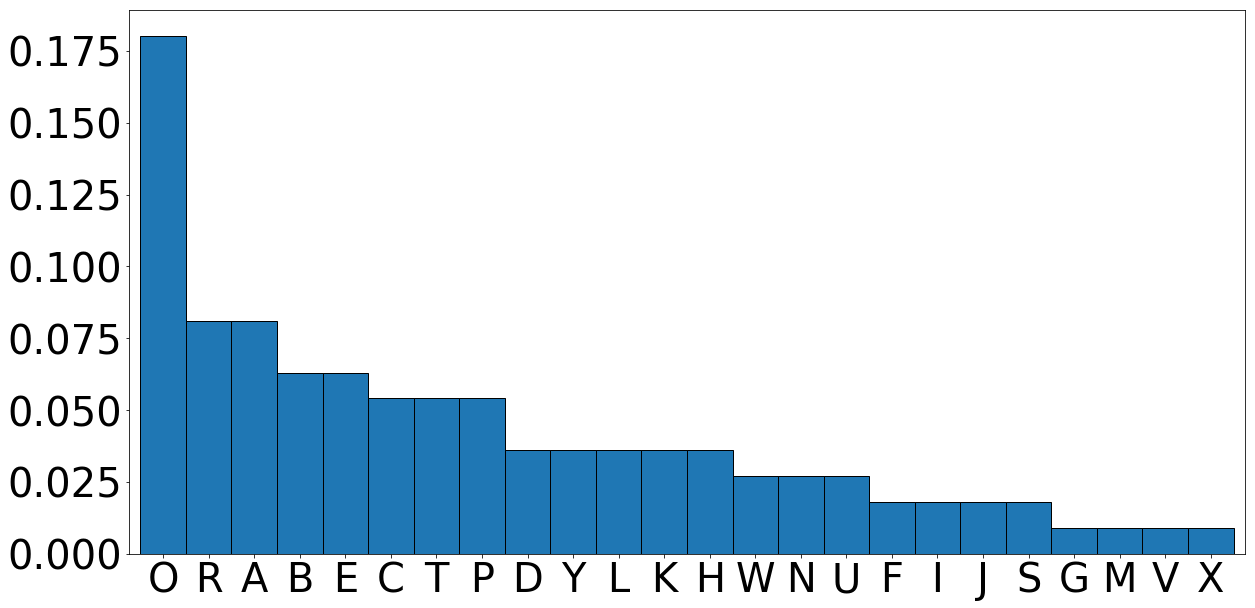

2.0478759504094537
0.40607800684920603

 4.0374011976541135


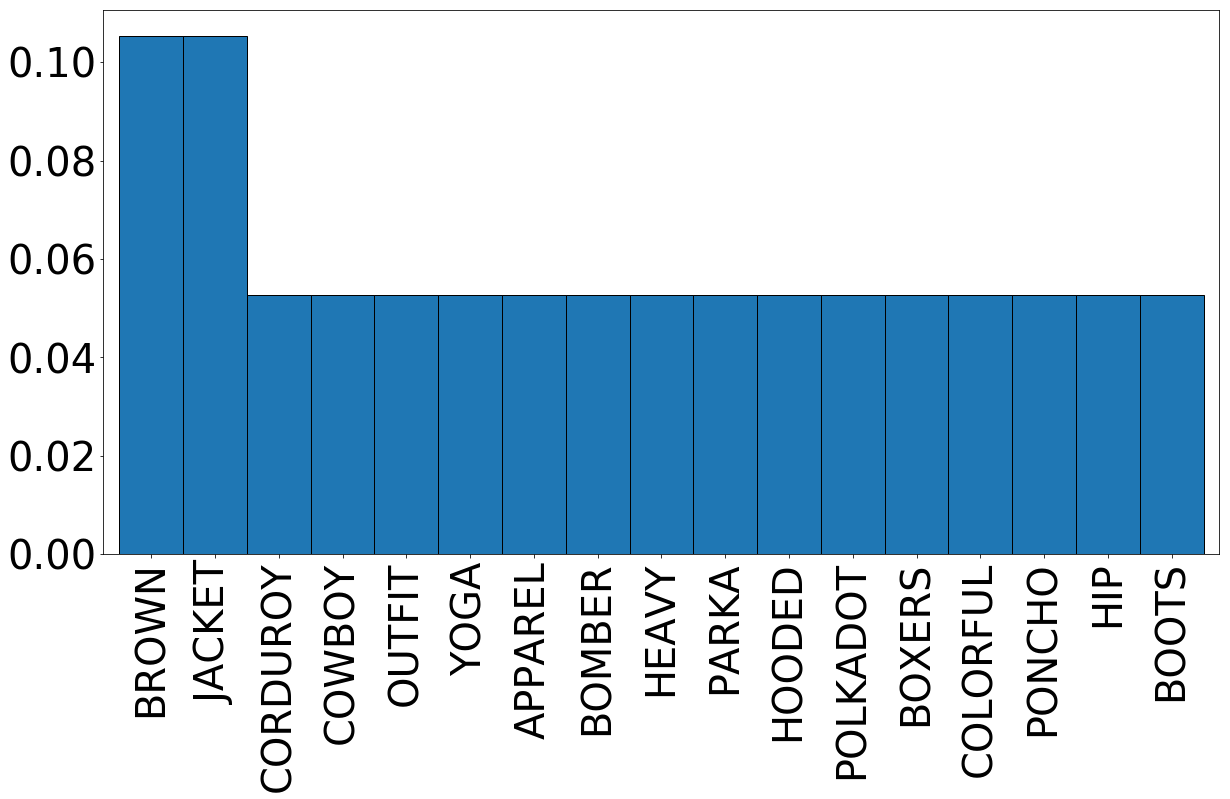

0.1325238037881997
-0.08246216019197222 




Category: Character
 3.970573095811684


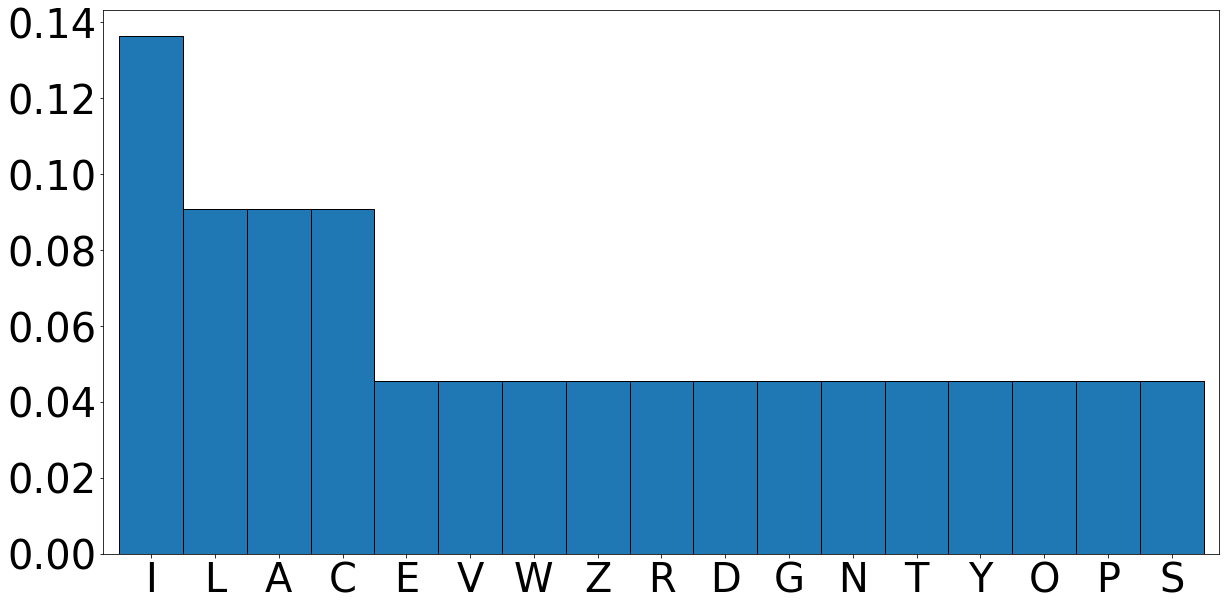

0.4217443269670753
-0.07038932789139701

 2.0


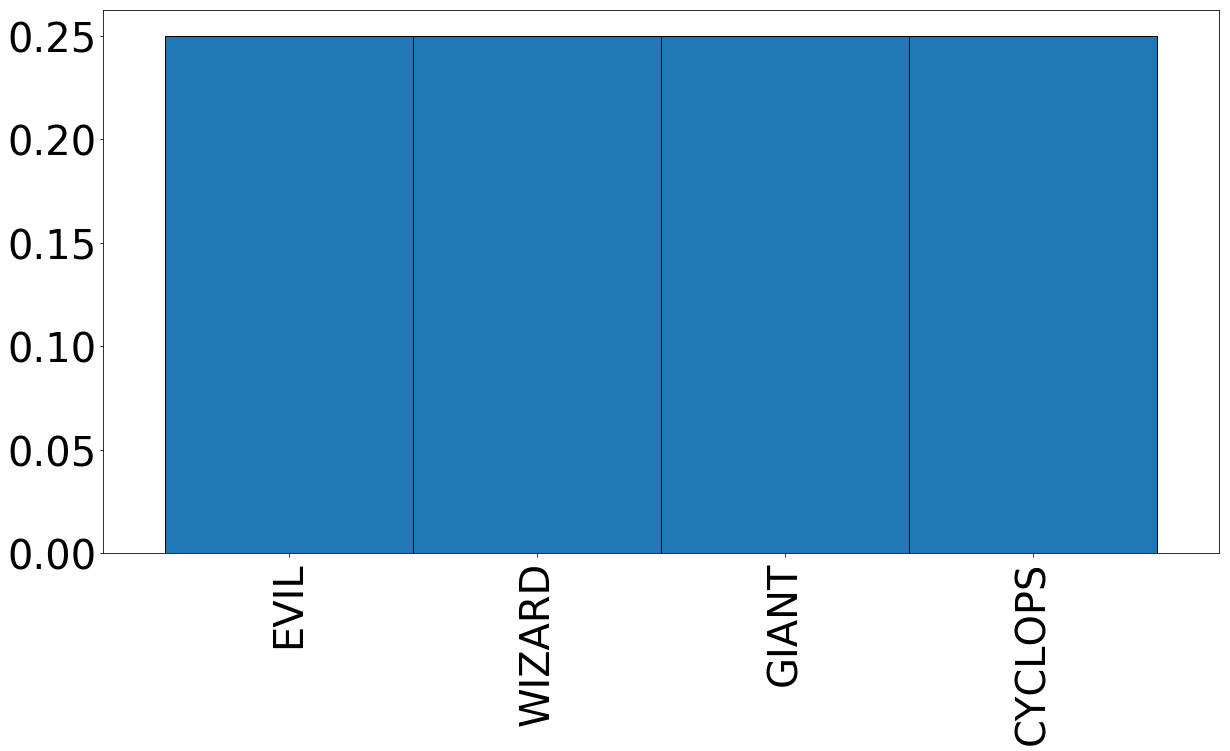

-0.4150374992788439
-0.5849625007211562 




Category: In the Kitchen
 3.9695040596285205


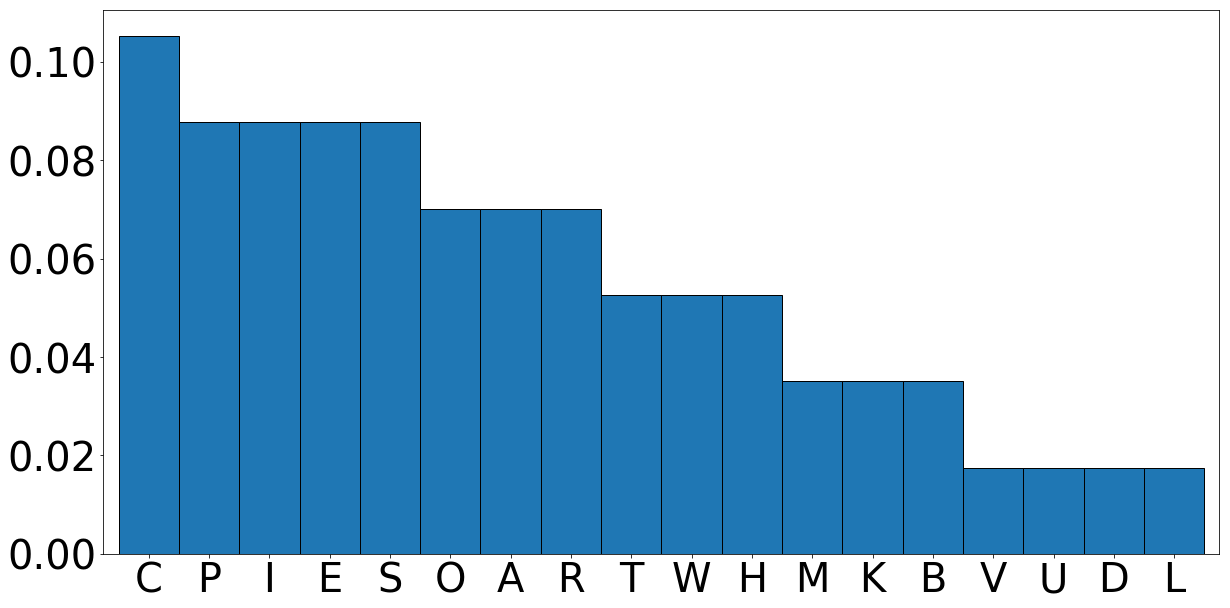

1.6235651481433717
0.1882905057527624

 3.0


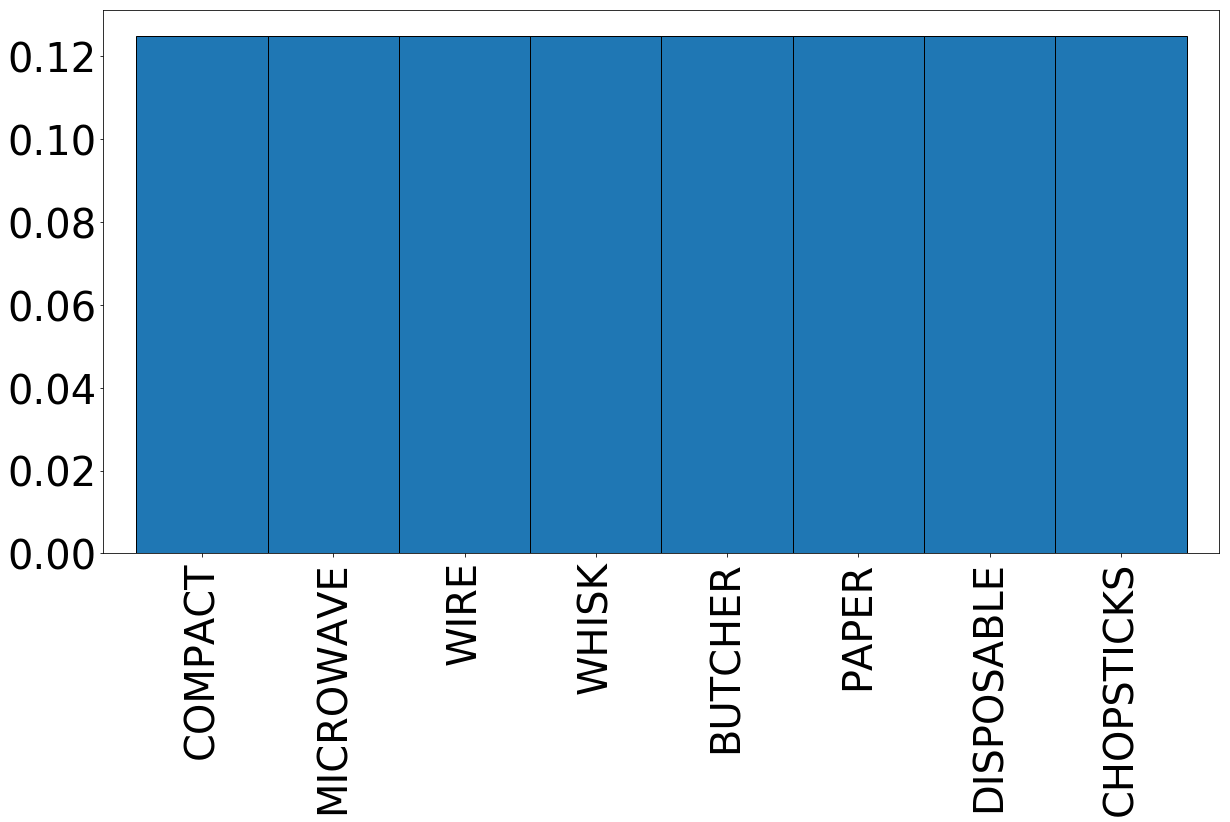

-0.19264507794239538
-0.22239242133644854 




Category: Characters
 3.4992275471326932


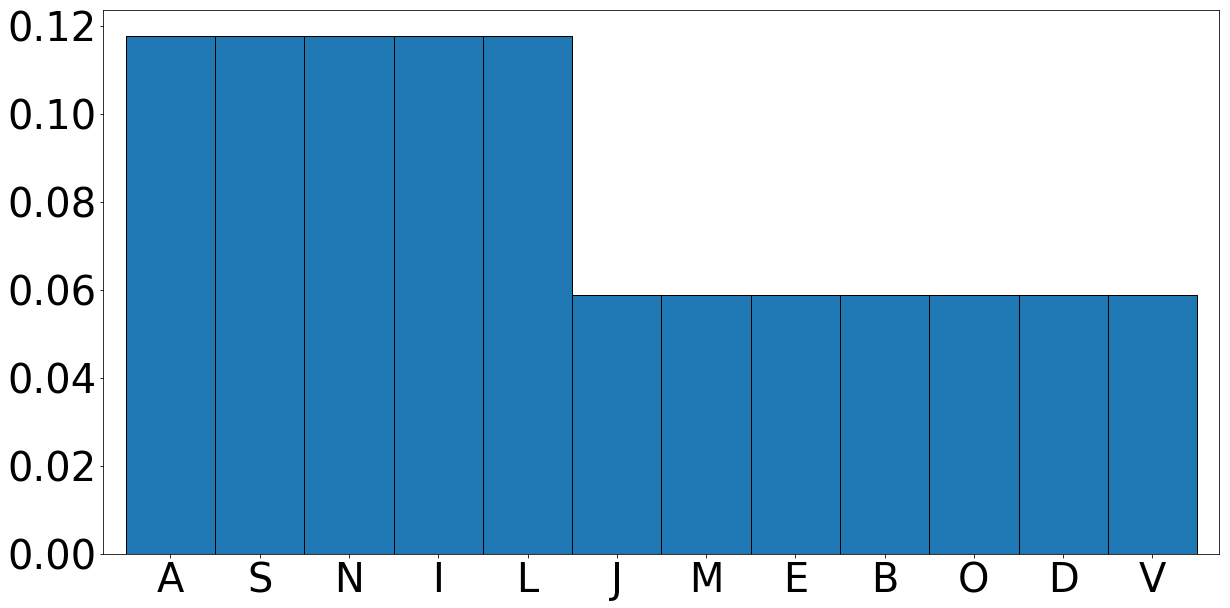

0.5007724528673065
-0.09310940439148219

 1.584962500721156


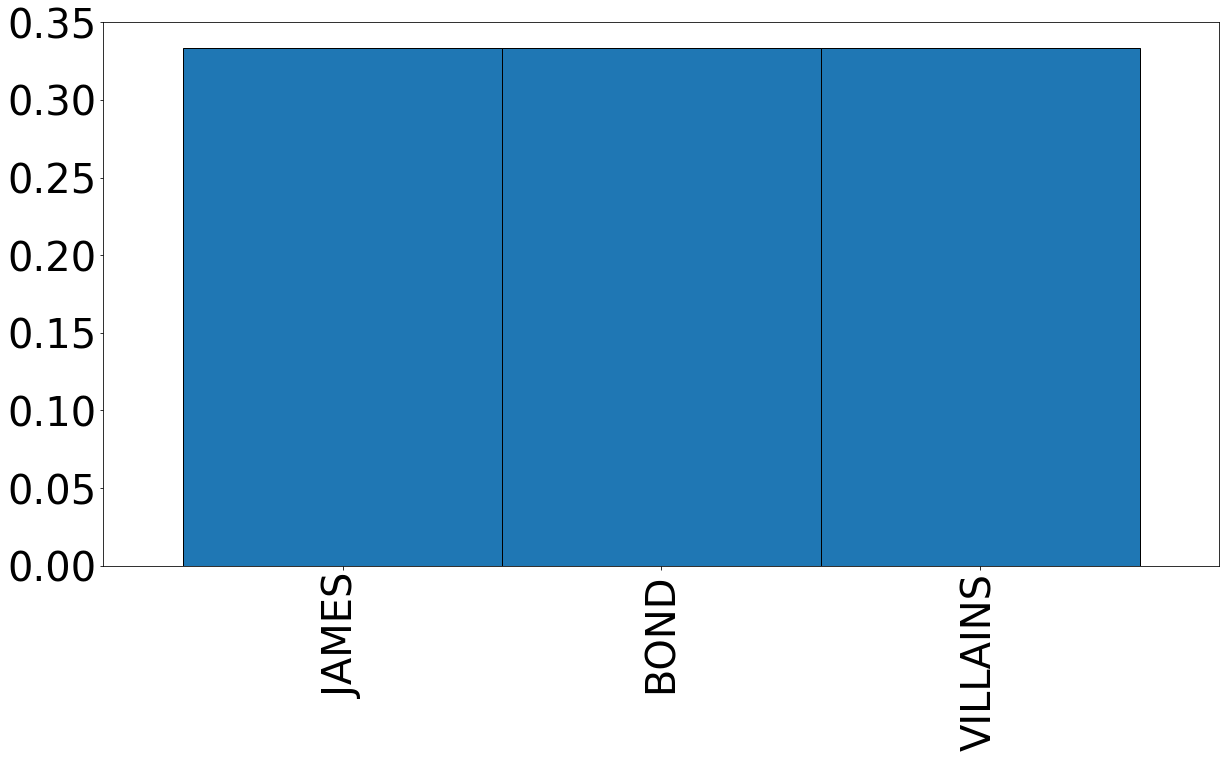

-0.5849625007211562
-1.0 






In [44]:
for cat in Categories:
    print("Category: " + cat + "\n",ngramEntropy(BPL[cat],1))
    FreqPlot(grams,BPL[cat])
    print(ngramEntropy(BPL[cat],2))
    print(ngramEntropy(BPL[cat],3))
    print("\n",ngramEntropy(BPW[cat],1))
    FreqPlot(grams,BPW[cat],turn=90)
    print(ngramEntropy(BPW[cat],2))
    print(ngramEntropy(BPW[cat],3),"\n\n\n\n")